In [1]:
#Bibliotecas para ler o dataframe e manipular os dados.
import pandas as pd
import numpy as np

#Bibliotecas para construir gráficos em Python.
import matplotlib.pyplot as plt
import seaborn as sns

#Biblitecas para construir o modelo preditivo.
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.pipeline import make_pipeline

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/fthara/housesPrices/master/train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.isnull().sum().iloc[0:50]

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [6]:
df_train.iloc[0:10, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## Ano da Venda

In [7]:
sales_year = df_train.groupby('YrSold')['SalePrice'].sum()
sales_year.head()

YrSold
2006    57320530
2007    61214777
2008    53917695
2009    60648051
2010    31043893
Name: SalePrice, dtype: int64

In [8]:
df_train.YrSold.isnull().sum()

0

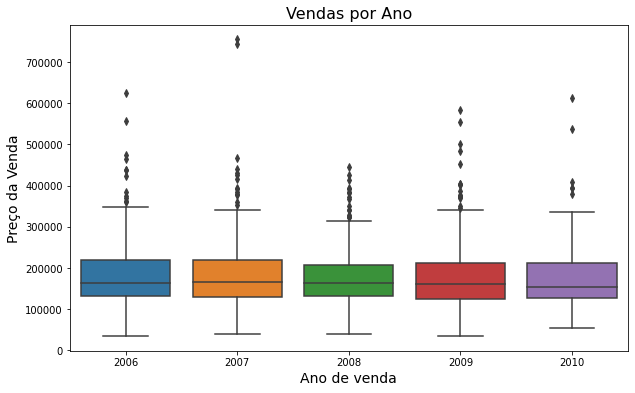

In [9]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x=df_train.YrSold, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Ano de venda", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Vendas por Ano", fontsize=16)
plt.show()

<p><font size="3.5">Uma preocupação minha era a diferença do valor das casas devido ao ano de venda, mas pelo visto os valores são bem parecidos em geral, portanto não não há necessidade de fazer uma correção pela inflação. Como estamos fazendo uma previsão do futuro e as médias de venda nos anos foram quase as mesmas, não vale a pena considerar esta variável para o modelo preditivo.</font><p>

In [10]:
df_train.loc[df_train['SalePrice'] > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


## Tipo de Habitação

In [11]:
df_train.MSSubClass.isnull().sum()

0

In [12]:
df_train.MSSubClass.value_counts().sort_values()

40       4
180     10
45      12
75      16
85      20
190     30
90      52
80      58
70      60
160     63
30      69
120     87
50     144
60     299
20     536
Name: MSSubClass, dtype: int64

In [13]:
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)

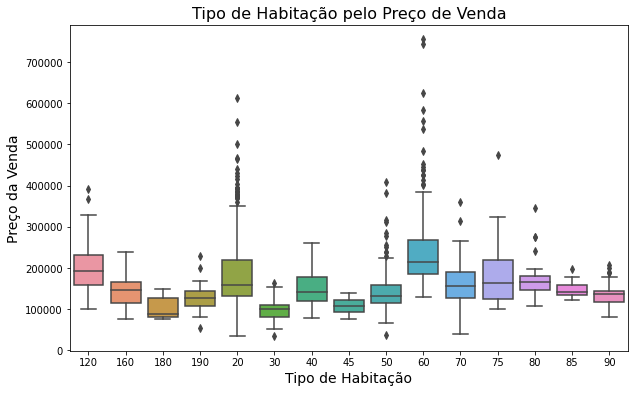

In [14]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x=df_train.MSSubClass, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Tipo de Habitação", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Tipo de Habitação pelo Preço de Venda", fontsize=16)
plt.show()

In [15]:
df_train.loc[df_train.MSSubClass == '40', 'MSSubClass'] = '70'

In [16]:
df_train.MSSubClass.value_counts().sort_values()

180     10
45      12
75      16
85      20
190     30
90      52
80      58
160     63
70      64
30      69
120     87
50     144
60     299
20     536
Name: MSSubClass, dtype: int64

<p><font size="3.5">A coluna "MSSubClass" influencia tem uma influência grande em nosso modelo, pois como podemos ver, a medida que o tipo de habitação muda, a mediana dos valores, assim como seus máximos, mínimos e até os outliers mudam de valor.</font><p>

## Tipo de Localização (zona)

In [17]:
df_train.MSZoning.isnull().sum()

0

In [18]:
df_train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

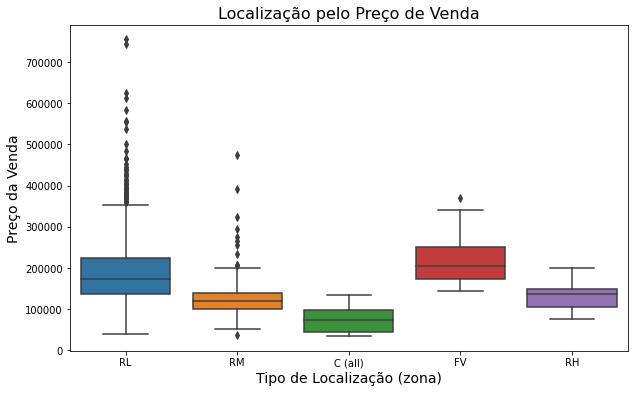

In [19]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x=df_train.MSZoning, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Tipo de Localização (zona)", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Localização pelo Preço de Venda", fontsize=16)
plt.show()

<p><font size="3.5">O tipo de localização, ou zona, das casas, é um iten bastante importante em nossa predição, pois como podemos ver no gráfico acima, o preço médio das casas variam bastante dependendo da zona. Por exemplo, casas de zonas comerciais são bem mais baratas do que casas flutuantes em geral. Casas localizadas em regiões com média densidade tem uma diferença pequena entre os valores, apesar dos outliers.</font><p>

## Distância até a Rua

In [20]:
df_train.LotFrontage.isnull().sum()

259

In [21]:
df_train.LotFrontage.median()

69.0

In [22]:
df_train.loc[df_train.LotFrontage.isnull() == True, ['LotFrontage']] = df_train.LotFrontage.median()

In [23]:
df_train.LotFrontage.isnull().sum()

0

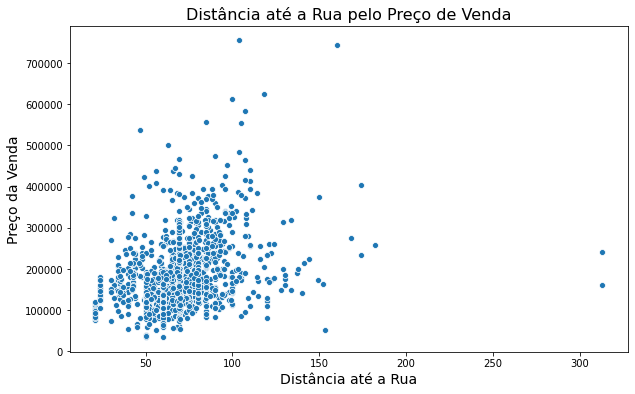

In [24]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(x=df_train.LotFrontage, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Distância até a Rua", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Distância até a Rua pelo Preço de Venda", fontsize=16)
plt.show()

In [25]:
df_train.loc[:, ["LotFrontage", "SalePrice"]].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.334771
SalePrice,0.334771,1.000000


<p><font size="3.5">Essa variável apresenta uma correlação positiva em relação ao valor das casas. Irei utilizar em meu modelo preditivo.</font><p>

## Área do Lote

In [26]:
df_train.LotArea.isnull().sum()

0

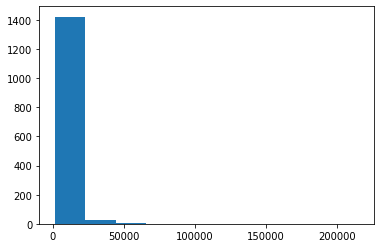

In [27]:
plt.hist(df_train.LotArea)
plt.show()

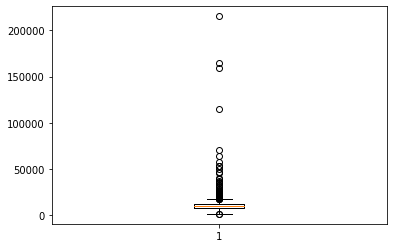

In [28]:
plt.boxplot(df_train.LotArea)
plt.show()

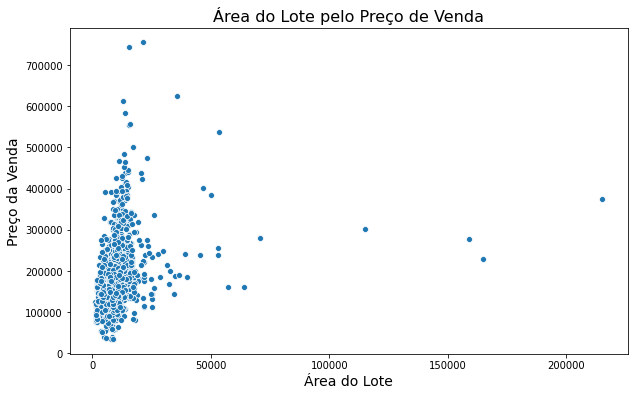

In [29]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(x=df_train.LotArea, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Área do Lote", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Área do Lote pelo Preço de Venda", fontsize=16)
plt.show()

In [30]:
df_train.loc[:, ["LotFrontage", "SalePrice", "LotArea"]].corr()

,LotFrontage,SalePrice,LotArea
LotFrontage,1.000000,0.334771,0.304522
SalePrice,0.334771,1.000000,0.263843
LotArea,0.304522,0.263843,1.000000


<p><font size="3.5">A área do lote é um item iteressante para ser analizado em nosso modelo de regressão.</font><p>

## Tipo de Acesso à Rodovia

In [31]:
df_train.Street.isnull().sum()

0

In [32]:
df_train.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

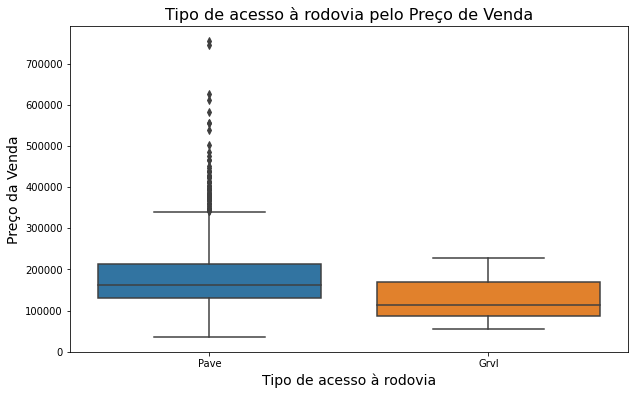

In [33]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x=df_train.Street, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Tipo de acesso à rodovia", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Tipo de acesso à rodovia pelo Preço de Venda", fontsize=16)
plt.show()

<p><font size="3.5">Devido aos pouquíssimos dados de ruas não pavimentadas, não da para fazer uma previsão boa a partir desses dados. Esse dado também não será utilizada no dataframe.</font><p>

## Tipo de Acesso ao Beco

In [34]:
df_train.Alley.isnull().sum()

1369

In [35]:
df_train["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

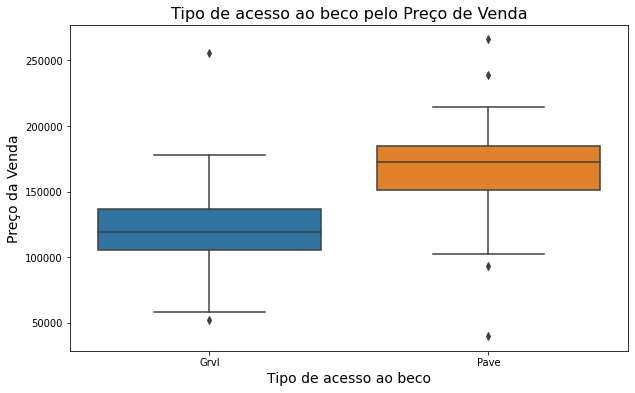

In [36]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x=df_train.Alley, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Tipo de acesso ao beco", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Tipo de acesso ao beco pelo Preço de Venda", fontsize=16)
plt.show()

<p><font size="3.5">Apesr de existir uma boa diferença, existem poucas ruas com acesso ao beco, por isso não será usado em nosso modelo preditivo</font><p>

## Forma Geral da Propriedade (LotShape)

In [37]:
df_train.LotShape.isnull().sum()

0

In [38]:
df_train["LotShape"].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

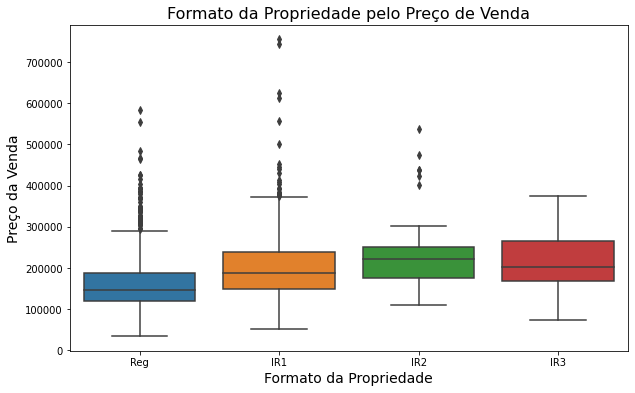

In [39]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x=df_train.LotShape, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Formato da Propriedade", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Formato da Propriedade pelo Preço de Venda", fontsize=16)
plt.show()

<p><font size="3.5">O formato da propriedade parece fazer uma pequena diferença no valor da casa. Casas que tem terrenos um pouco irregulares são mais caras do que casas de formato regular, por isso será utilizada no dataframe.</font><p>

## Planicidade do Terreno

In [40]:
df_train.LandContour.isnull().sum()

0

In [41]:
df_train["LandContour"].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

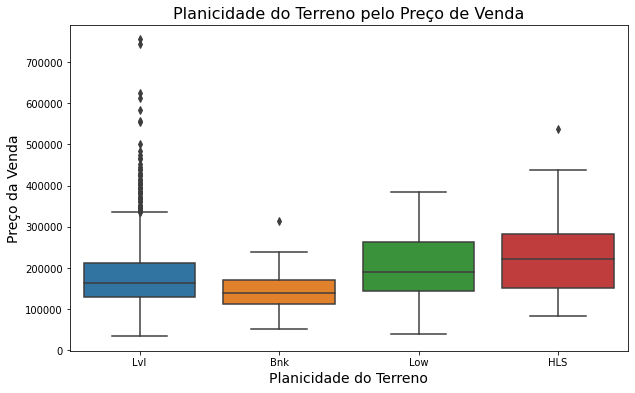

In [42]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x=df_train.LandContour, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Planicidade do Terreno", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Planicidade do Terreno pelo Preço de Venda", fontsize=16)
plt.show()

<p><font size="3.5">Apesar da maioria das casas serem planas e não existirem muitos dados nas outras variáveis eu decidi usar esses dados pelo fato de eles terem valores bem distintos entre cada categoria.</font><p>

## Utilidades Públicas

In [43]:
df_train.Utilities.isnull().sum()

0

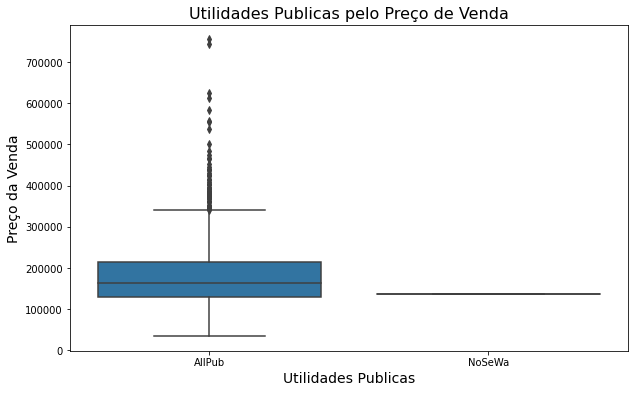

In [44]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x=df_train.Utilities, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Utilidades Publicas", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Utilidades Publicas pelo Preço de Venda", fontsize=16)
plt.show()

In [45]:
df_train["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [46]:
df_train.loc[df_train["Utilities"]=="NoSeWa"]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
944,945,20,RL,69.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


<p><font size="3.5">Como praticamente todas as casas possuem todas as utilidades públicas não irei considerar essa coluna no modelo preditivo.</font><p>

## Configuração do Lote

In [47]:
df_train.LotConfig.isnull().sum()

0

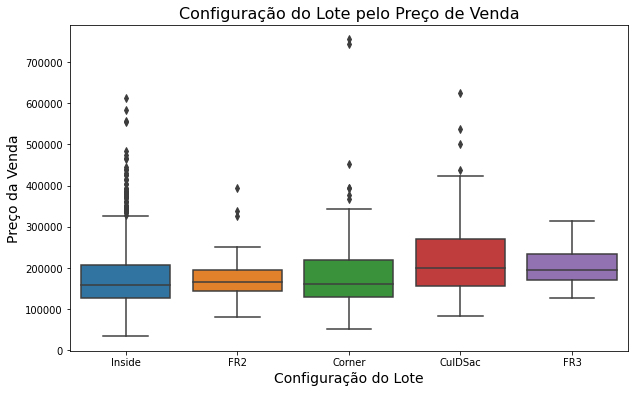

In [48]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x=df_train.LotConfig, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Configuração do Lote", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Configuração do Lote pelo Preço de Venda", fontsize=16)
plt.show()

In [49]:
df_train["LotConfig"].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

<p><font size="3.5">A configuração do lote não me parece fazer muita diferença no valor do imóvel, visto que os valores deles estão bem próximos um dos outros. A mediana também é bem aproximada. Devido a isso decidi não utilizar esta coluna em meu modelo.</font><p>

## Declive da Propriedade

In [50]:
df_train.LandSlope.isnull().sum()

0

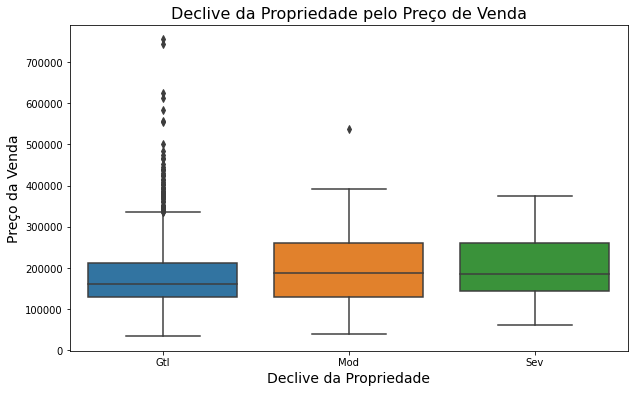

In [51]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x=df_train.LandSlope, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Declive da Propriedade", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Declive da Propriedade pelo Preço de Venda", fontsize=16)
plt.show()

In [52]:
df_train["LandSlope"].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

<p><font size="3.5">O declive da propriedade também não interfere diratemente no preço, pois os valores das propriedades são praticamente os mesmos, independentemente do tipo de declive.</font><p>

## Localizações físicas dentro dos limites da cidade de Ames

In [53]:
df_train.Neighborhood.isnull().sum()

0

In [54]:
df_train["Neighborhood"].value_counts().sort_values()

Blueste      2
NPkVill      9
Veenker     11
BrDale      16
MeadowV     17
Blmngtn     17
StoneBr     25
SWISU       25
ClearCr     28
IDOTRR      37
Timber      38
NoRidge     41
Mitchel     49
Crawfor     51
BrkSide     58
SawyerW     59
NWAmes      73
Sawyer      74
NridgHt     77
Gilbert     79
Somerst     86
Edwards    100
OldTown    113
CollgCr    150
NAmes      225
Name: Neighborhood, dtype: int64

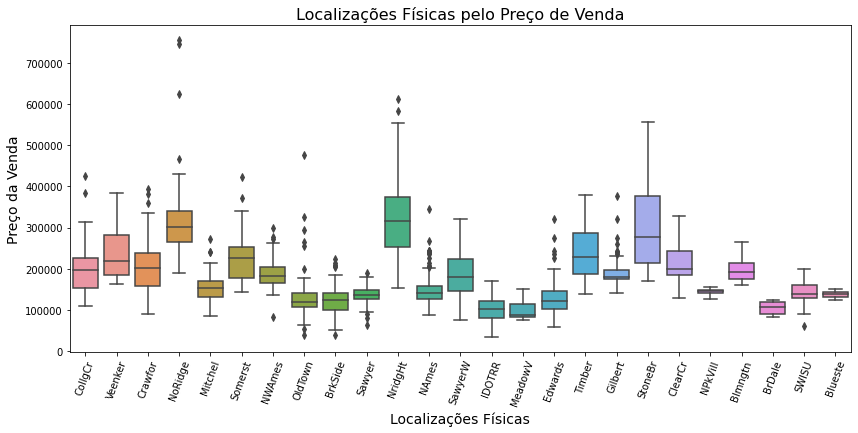

In [55]:
plt.figure(figsize=(14,6))
ax=sns.boxplot(x=df_train.Neighborhood, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Localizações Físicas", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Localizações Físicas pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [56]:
df_train.loc[df_train["Neighborhood"]=='Blueste', "Neighborhood"] = "SWISU"
df_train.loc[df_train["Neighborhood"]=='NPkVill', "Neighborhood"] = "SWISU"

<p><font size="3.5">Pelo fato dos dados estarem bem distribuidos e com alguns deles com valores em faixas diferentes uma das outras decidi utilizar esta coluna em meu modelo preditivo.</font><p>

## Proximiade da Estrada Principal ou Ferrovia

In [57]:
df_train.Condition1.isnull().sum()

0

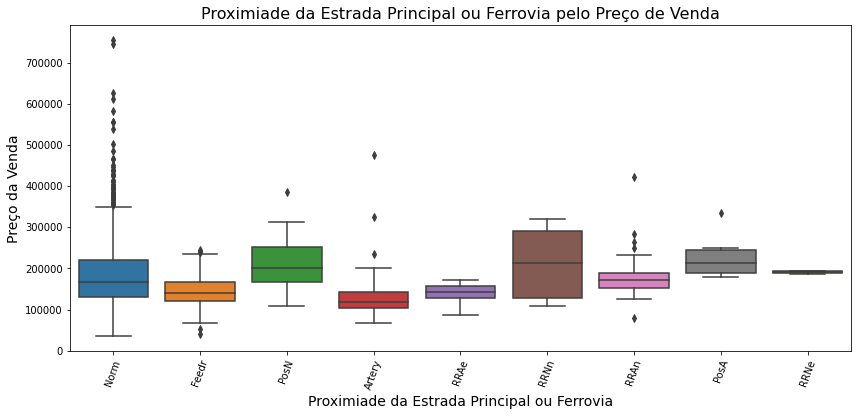

In [58]:
plt.figure(figsize=(14,6))
ax=sns.boxplot(x=df_train.Condition1, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Proximiade da Estrada Principal ou Ferrovia", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Proximiade da Estrada Principal ou Ferrovia pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [59]:
df_train["Condition1"].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [60]:
df_train.loc[df_train["Condition1"] == "RRNe", "Condition1"] = "RRNn"
df_train.loc[df_train["Condition1"] == "PosA", "Condition1"] = "RRNn"

<p><font size="3.5">Este dado também é muito interessante, pois em alguns casos os valores são bem diferentes.</font><p>

## Proximiade da Estrada Principal ou Ferrovia (se houver mais de uma)

In [61]:
df_train.Condition2.isnull().sum()

0

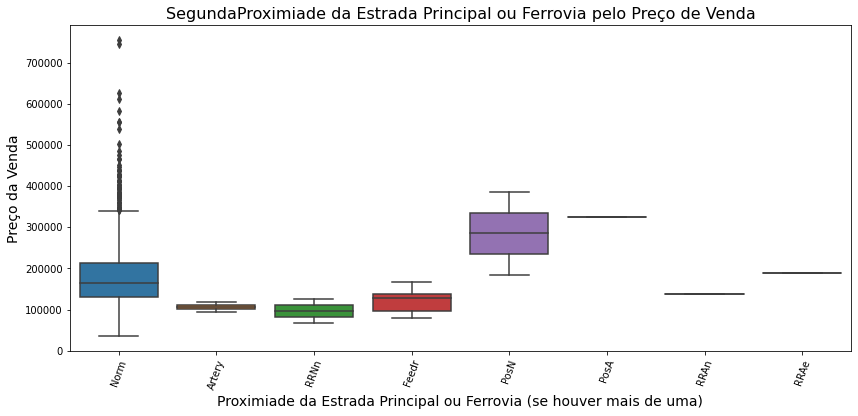

In [62]:
plt.figure(figsize=(14,6))
ax=sns.boxplot(x=df_train.Condition2, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Proximiade da Estrada Principal ou Ferrovia (se houver mais de uma)", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("SegundaProximiade da Estrada Principal ou Ferrovia pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [63]:
df_train["Condition2"].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

In [64]:
df_train1 = df_train.copy()
df_train1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
df_train1["Same"] = np.where(df_train1["Condition1"] == df_train1["Condition2"], 1, 0)

In [66]:
df_train1["Same"].value_counts()

1    1265
0     195
Name: Same, dtype: int64

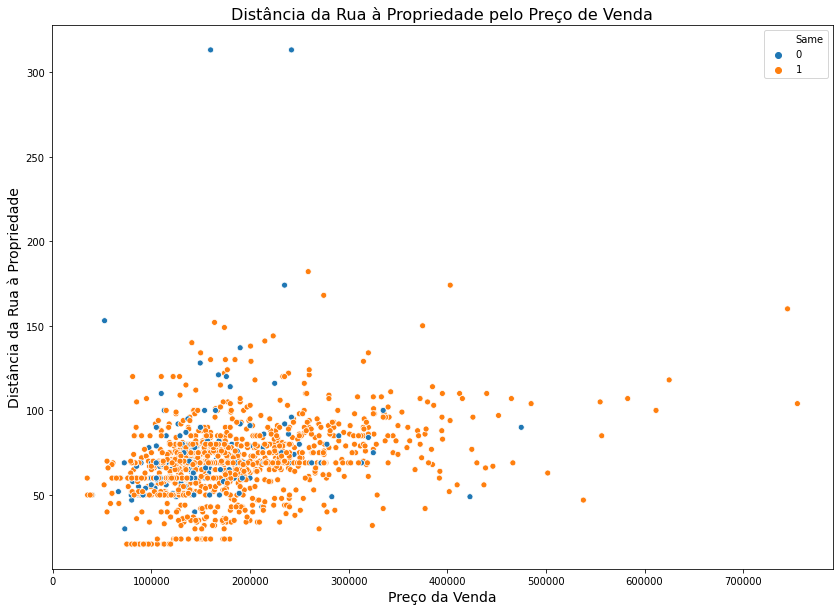

In [67]:
plt.figure(figsize=(14,10))
ax=sns.scatterplot(x=df_train1.SalePrice, y=df_train1.LotFrontage, hue=df_train1.Same, data=df_train1)
ax.xaxis.set_label_text("Preço da Venda", fontsize=14)
ax.yaxis.set_label_text("Distância da Rua à Propriedade", fontsize=14)
ax.set_title("Distância da Rua à Propriedade pelo Preço de Venda", fontsize=16)
plt.show()

<p><font size="3.5">Tentei explorar essa coluna pensando que ter 2 proximidades influenciaria no valor do imóvel, mas aprentemente essa variável também não influencia muito. Por isso não irei utilizá-la.</font><p>

## Tipo de moradia

In [68]:
df_train.BldgType.isnull().sum()

0

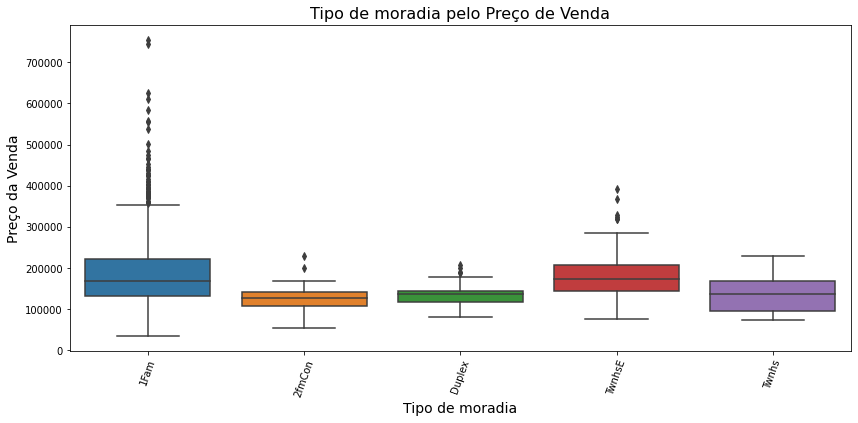

In [69]:
plt.figure(figsize=(14,6))
ax=sns.boxplot(x=df_train.BldgType, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Tipo de moradia", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Tipo de moradia pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [70]:
df_train["BldgType"].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

<p><font size="3.5">O tipo de moradia também parece influenciar no valor do meu imóvel, por isso irei utilizar.</font><p>

## Estilo de Habitação

In [71]:
df_train.HouseStyle.isnull().sum()

0

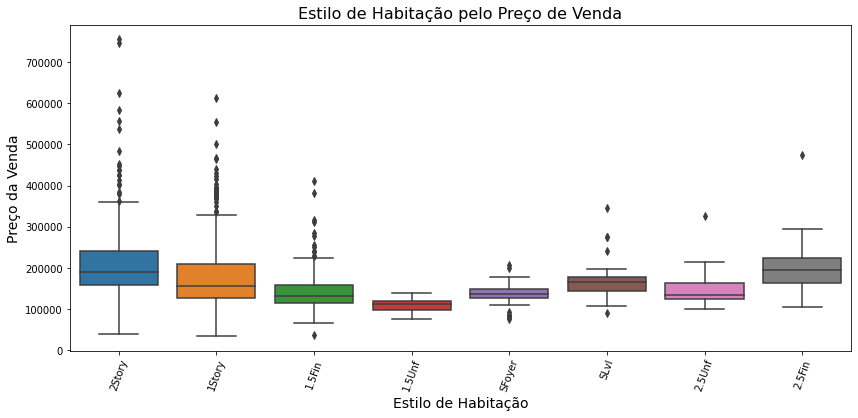

In [72]:
plt.figure(figsize=(14,6))
ax=sns.boxplot(x=df_train.HouseStyle, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Estilo de Habitação", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Estilo de Habitação pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [73]:
df_train.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

<p><font size="3.5">Essa variável também nos traz dados bem interessantes, por isso irei utilizar em meu porgrama.</font><p>

## Qualidade geral do material e acabamento

In [74]:
df_train.OverallQual.isnull().sum()

0

In [75]:
df_train.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

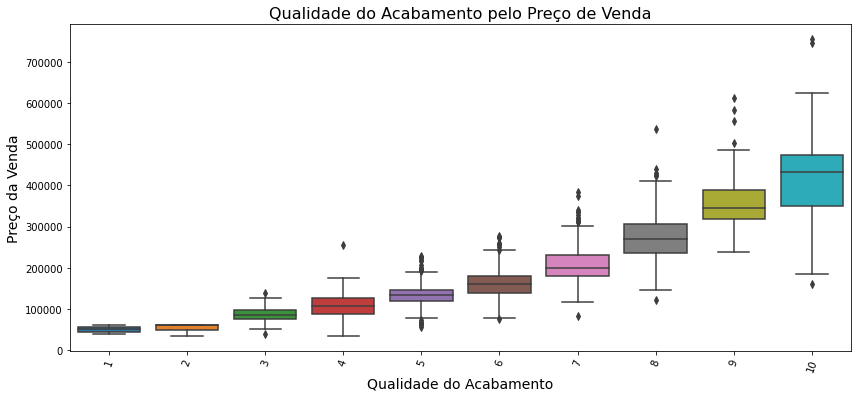

In [76]:
plt.figure(figsize=(14,6))
ax=sns.boxplot(x=df_train.OverallQual, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Qualidade do Acabamento", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Qualidade do Acabamento pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [77]:
df_train.loc[:, ["OverallQual", "SalePrice"]].corr()

,OverallQual,SalePrice
OverallQual,1.000000,0.790982
SalePrice,0.790982,1.000000


<p><font size="3.5">Essa talvez seja a variável que mais influenciará em nosso modelo preditivo. Podemos ver nesse gráfico que a medida que a qualidade do material aumenta, o preço também aumenta quase que de uma forma linear.</font><p>

## Classificação geral das condições

In [78]:
df_train.OverallCond.isnull().sum()

0

In [79]:
df_train.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

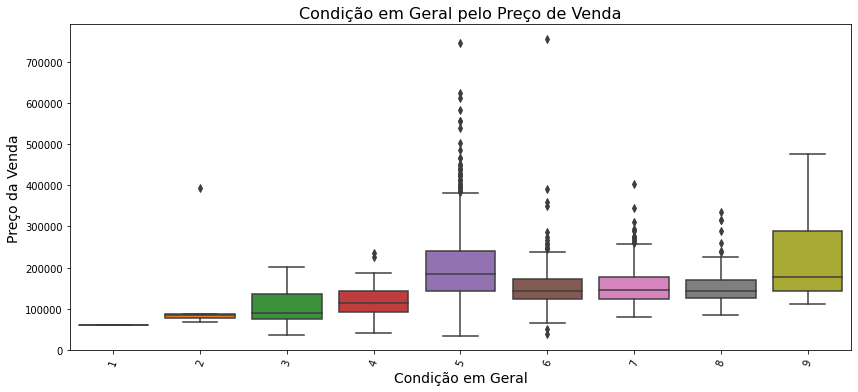

In [80]:
plt.figure(figsize=(14,6))
ax=sns.boxplot(x=df_train.OverallCond, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Condição em Geral", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Condição em Geral pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [81]:
df_train.loc[:, ['OverallCond', 'SalePrice']].corr()

,OverallCond,SalePrice
OverallCond,1.000000,-0.077856
SalePrice,-0.077856,1.000000


<p><font size="3.5">Essa variável não apresenta uma correlação muito forte com a variável preço, por isso não será utilizada.</font><p>

## Data de construção original

In [82]:
df_train.YearBuilt.isnull().sum()

0

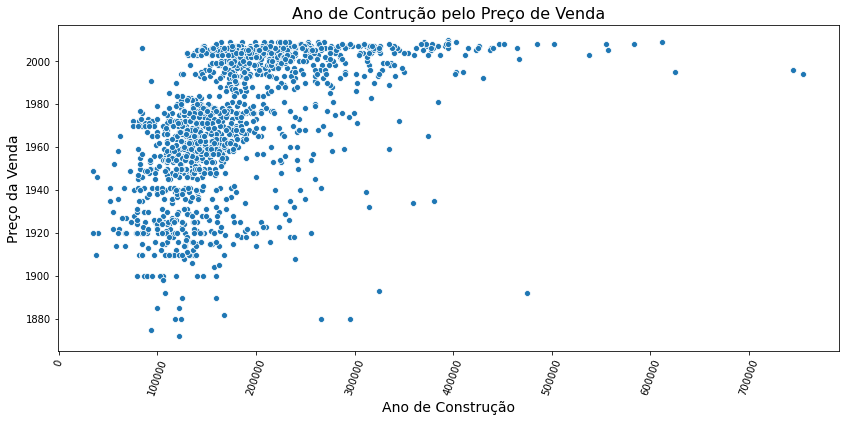

In [83]:
plt.figure(figsize=(14,6))
ax=sns.scatterplot(x=df_train.SalePrice, y=df_train.YearBuilt, data=df_train)
ax.xaxis.set_label_text("Ano de Construção", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Ano de Contrução pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [84]:
df_train.loc[:, ["YearBuilt", "SalePrice"]].corr()

,YearBuilt,SalePrice
YearBuilt,1.000000,0.522897
SalePrice,0.522897,1.000000


<p><font size="3.5">Esses dados são interessantes, mas vamos olhar a coluna abaixo.</font><p>

## Data da Reforma

In [85]:
df_train.YearRemodAdd.isnull().sum()

0

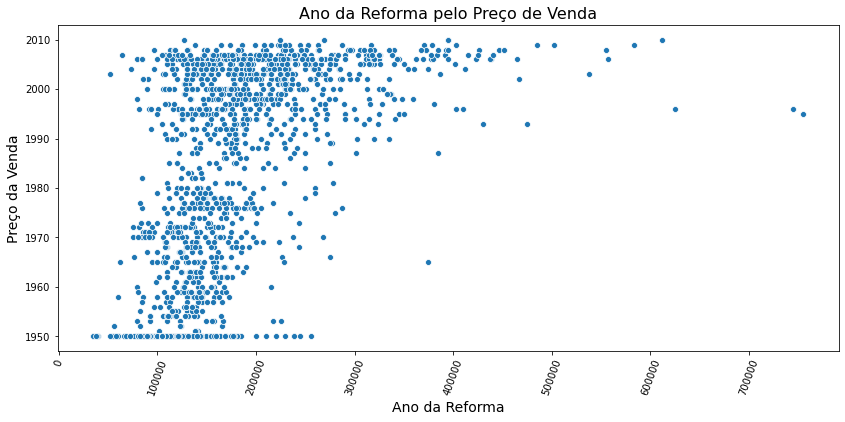

In [86]:
plt.figure(figsize=(14,6))
ax=sns.scatterplot(x=df_train.SalePrice, y=df_train.YearRemodAdd, data=df_train)
ax.xaxis.set_label_text("Ano da Reforma", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Ano da Reforma pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [87]:
df_train.loc[:, ["YearRemodAdd", "SalePrice"]].corr()

,YearRemodAdd,SalePrice
YearRemodAdd,1.000000,0.507101
SalePrice,0.507101,1.000000


<p><font size="3.5">Essa coluna e a anterior querem dizer praticamente a mesma coisa, mas apesar da correlação da primeira ser melhor, irei utilizar a segunda por intuição. Sabemos que quando a casa é reformada, seu valor aumenta, logo, acredito que a ultima data de reforma seja mais importante do que a data original de construção.</font><p>

## Tipo de Telhado

In [88]:
df_train.RoofStyle.isnull().sum()

0

In [89]:
df_train["RoofStyle"].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

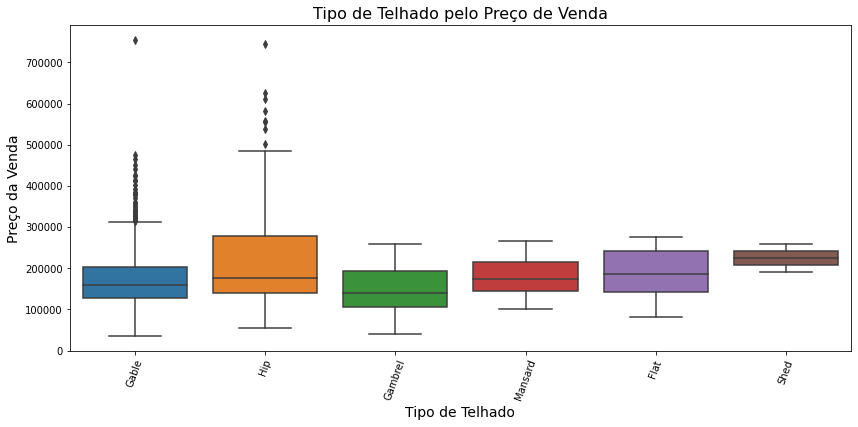

In [90]:
plt.figure(figsize=(14,6))
ax=sns.boxplot(x=df_train.RoofStyle, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Tipo de Telhado", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Tipo de Telhado pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">O tipo de telhado parece não influenciar muito na decisão da compra de uma casa, pois os valores não variam tanto de um tipo para outro, além de que os dados estão muito desbalanceados nesse dataset.</font><p>

## Material do Telhado

In [91]:
df_train.RoofMatl.isnull().sum()

0

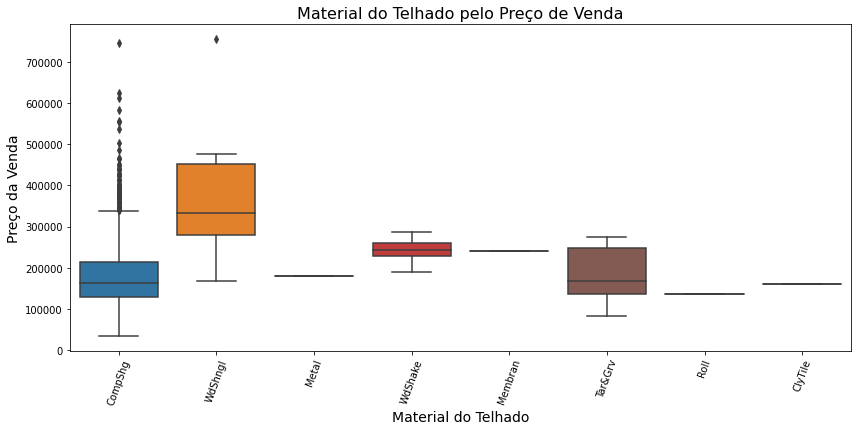

In [92]:
plt.figure(figsize=(14,6))
ax=sns.boxplot(x=df_train.RoofMatl, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Material do Telhado", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Material do Telhado pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [93]:
df_train["RoofMatl"].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
ClyTile       1
Membran       1
Name: RoofMatl, dtype: int64

<p><font size="3.5">Apesar dos valores parecerem bem diferentes dependendo do tipo de material eu decidi não utilizá-lo a um primeiro momento pelo fato de existir muitas amostras de um tipo só.</font><p>

## Revestimento exterior da casa

In [94]:
df_train.Exterior1st.isnull().sum()

0

In [95]:
df_train["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

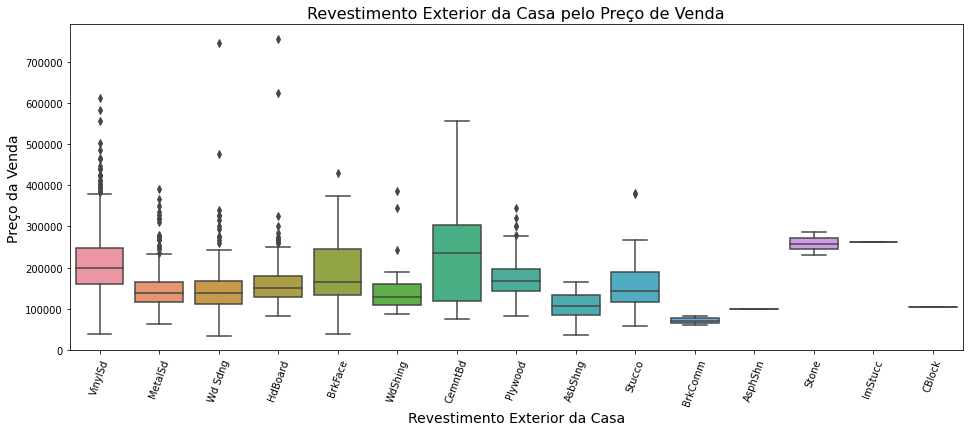

In [96]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.Exterior1st, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Revestimento Exterior da Casa", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Revestimento Exterior da Casa pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [97]:
df_train.loc[df_train["Exterior1st"]=='AsphShn', 'Exterior1st'] = 'AsbShng'
df_train.loc[df_train["Exterior1st"]=='CBlock', 'Exterior1st'] = 'AsbShng'
df_train.loc[df_train["Exterior1st"]=='BrkComm', 'Exterior1st'] = 'AsbShng'
df_train.loc[df_train["Exterior1st"]=='ImStucc', 'Exterior1st'] = 'CemntBd'
df_train.loc[df_train["Exterior1st"]=='Stone', 'Exterior1st'] = 'CemntBd'

<p><font size="3.5">Esse dados vale a pena explorar um pouco mais, pois dependendo do tipo de revestimento externo os valores ficam bem diferentes.</font><p>

## 2º Revestimento exterior da casa

In [98]:
df_train.Exterior2nd.isnull().sum()

0

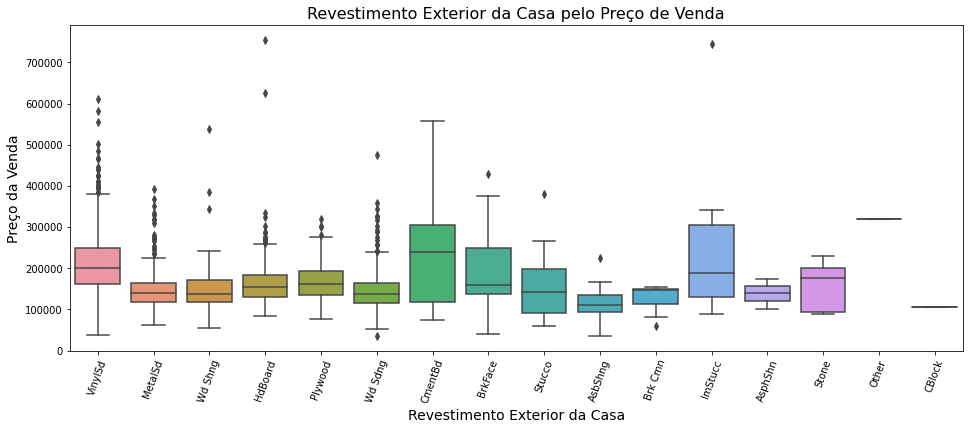

In [99]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.Exterior2nd, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Revestimento Exterior da Casa", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Revestimento Exterior da Casa pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [100]:
df_train1["SameExterior"] = np.where(df_train1["Exterior1st"] == df_train1["Exterior2nd"], 1, 0)

In [101]:
df_train1["SameExterior"].value_counts()

1    1245
0     215
Name: SameExterior, dtype: int64

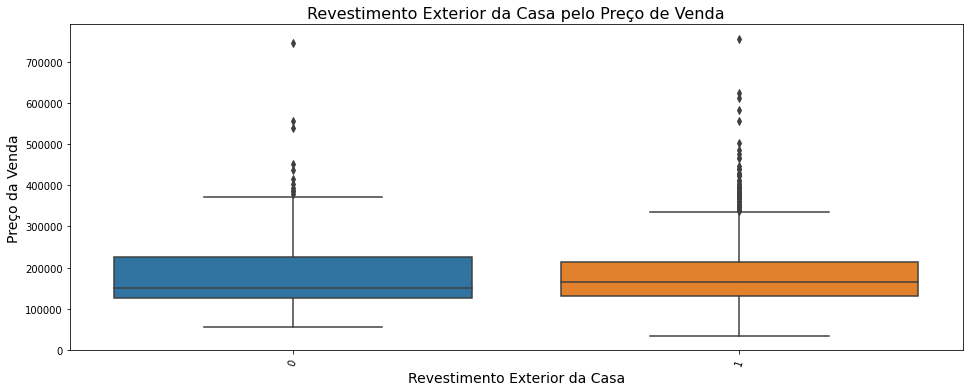

In [102]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train1.SameExterior, y=df_train1.SalePrice, data=df_train1)
ax.xaxis.set_label_text("Revestimento Exterior da Casa", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Revestimento Exterior da Casa pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Essa coluna também não vale a pena ser considerada, pois existem pouquissimas casas com mais de um revestimento exterior, além de que não há nenhuma diferença de preço das casas que tem mais de um revestimento exterior.</font><p>

## Tipo de folheado de alvenaria

In [103]:
df_train.MasVnrType.isnull().sum()

8

In [104]:
df_train.loc[df_train.MasVnrType.isnull() == True, ("MasVnrType", "SalePrice", "LotArea")]

,MasVnrType,SalePrice,LotArea
234,NaN,216500,7851
529,NaN,200624,32668
650,NaN,205950,8125
936,NaN,184900,10083
973,NaN,182000,11639
977,NaN,199900,4274
1243,NaN,465000,13891
1278,NaN,237000,9473


In [105]:
df_train.loc[df_train.MasVnrType.isnull() == True, "MasVnrType"] = "NA_MasVnrType"

In [106]:
df_train.MasVnrType.value_counts()

None             864
BrkFace          445
Stone            128
BrkCmn            15
NA_MasVnrType      8
Name: MasVnrType, dtype: int64

<p><font size="3.5">Essa coluna possuia alguns valores nulos, para preencher isso eu criei uma nova categoria "NA" }para podermos visualizar esses dados de uma melhor forma.</font><p>

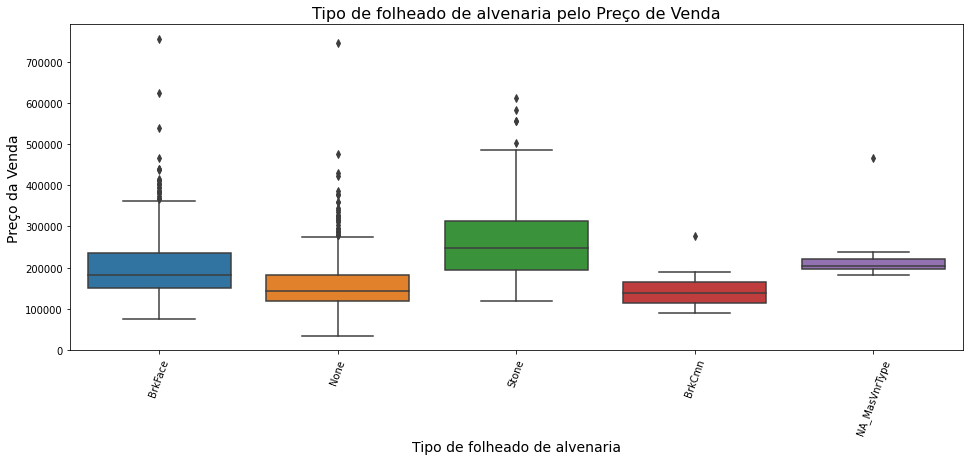

In [107]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.MasVnrType, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Tipo de folheado de alvenaria", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Tipo de folheado de alvenaria pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Essa coluna pode fazer diferença em nosso modelo, pois os valores variam um pouco de acordo com cada tipo de folheado.</font><p>

## Área de folheado de alvenaria em pés quadrados

In [108]:
df_train.MasVnrArea.isnull().sum()

8

<p><font size="3.5">Como o valor das casas com o tipo de folheado igual a NA está mais ou menos na média, vou colocar a área deles na média também.</font><p>

In [109]:
df_train.loc[df_train.MasVnrArea.isnull() == True, "MasVnrArea"] = df_train.MasVnrArea.mean()

In [110]:
df_train.MasVnrArea.isnull().sum()

0

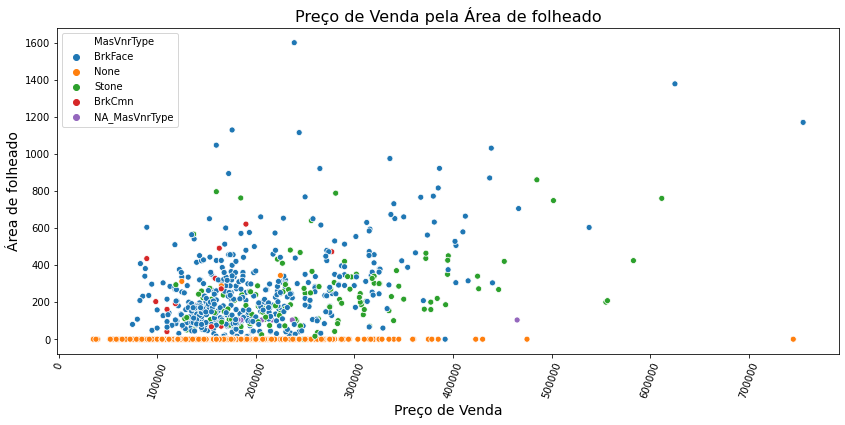

In [111]:
plt.figure(figsize=(14,6))
ax=sns.scatterplot(x=df_train.SalePrice, y=df_train.MasVnrArea, hue=df_train.MasVnrType, data=df_train)
ax.xaxis.set_label_text("Preço de Venda", fontsize=14)
ax.yaxis.set_label_text("Área de folheado", fontsize=14)
ax.set_title("Preço de Venda pela Área de folheado", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [112]:
df_train.loc[:, ("MasVnrArea", "SalePrice")].corr()

,MasVnrArea,SalePrice
MasVnrArea,1.000000,0.475241
SalePrice,0.475241,1.000000


<p><font size="3.5">Essa variável possui uma boa correlação com o valor do imóvel, por isso será utilizada em meu modelo de regressão.</font><p>

## Qualidade do material externo

In [113]:
df_train.ExterQual.isnull().sum()

0

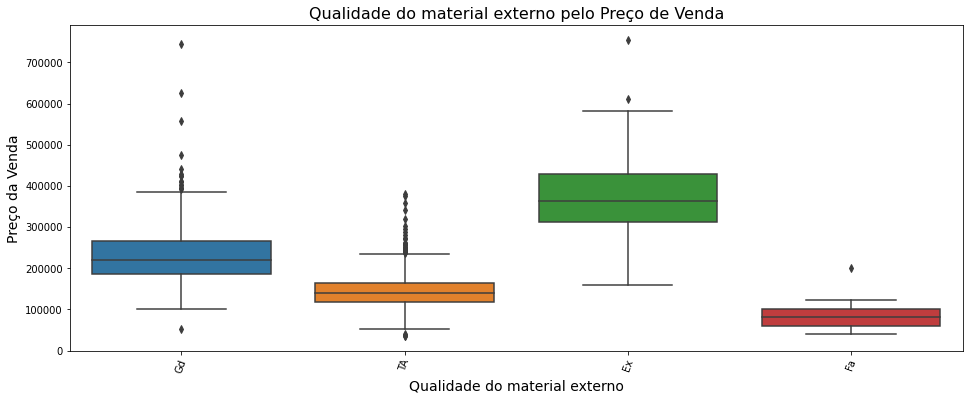

In [114]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.ExterQual, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Qualidade do material externo", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Qualidade do material externo pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [115]:
df_train.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

<p><font size="3.5">Este é um item que faz bastante diferença como podemos ver no gráfico acima. Com certeza será considerado para nosso algoritmo. Pensando como comprador eu também gostaria de ter uma casa com materiais de boa qualidade.</font><p>

## Condição atual do material no externo

In [116]:
df_train.ExterCond.isnull().sum()

0

In [117]:
df_train.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

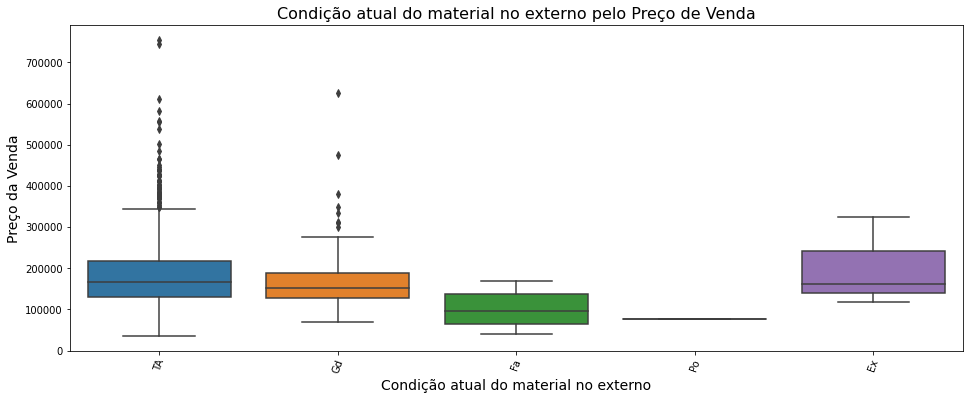

In [118]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.ExterCond, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Condição atual do material no externo", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Condição atual do material no externo pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [119]:
df_train.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

<p><font size="3.5">Como os dados estão muito desbalanceados não usarei no modelo preditivo</font><p>

## Tipo de fundação

In [120]:
df_train.Foundation.isnull().sum()

0

In [121]:
df_train.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

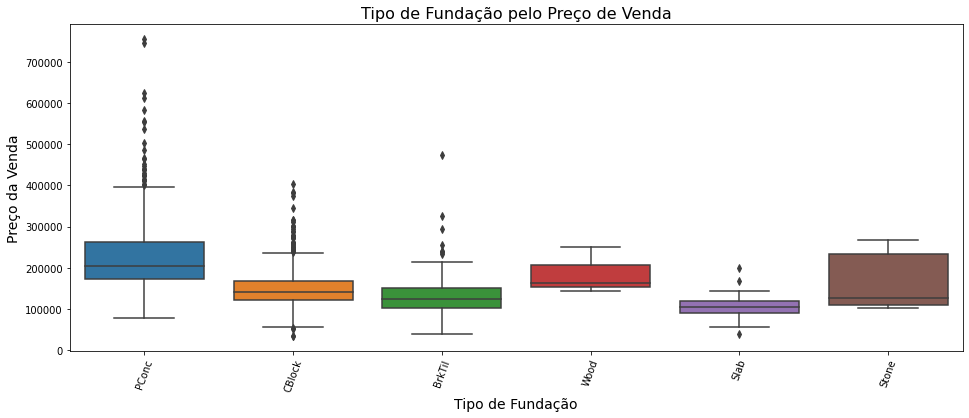

In [122]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.Foundation, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Tipo de Fundação", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Tipo de Fundação pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [123]:
df_train.loc[df_train.Foundation == 'Stone', 'Foundation'] = 'Others'
df_train.loc[df_train.Foundation == 'Wood', 'Foundation'] = 'Others'

<p><font size="3.5">Pensei que o tipo de fundação não faria tanta diferença, por ser um fator invisível a olho nú e que muitas pessoas nem se dão conta de perguntar, mas olhando no gráfico vejo que faz diferença pelo menos no valor das casas, portanto será utilizada.</font><p>

## Altura do porão

In [124]:
df_train.BsmtQual.isnull().sum()

37

In [125]:
df_train.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [126]:
df_train.loc[df_train.BsmtQual.isnull() == True, "BsmtQual"] = "NA_BsmtQual"

In [127]:
df_train.BsmtQual.value_counts()

TA             649
Gd             618
Ex             121
NA_BsmtQual     37
Fa              35
Name: BsmtQual, dtype: int64

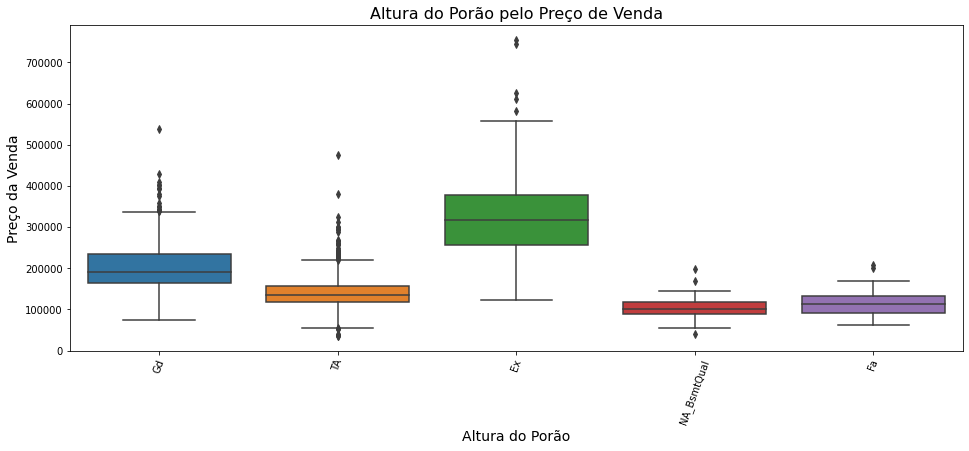

In [128]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.BsmtQual, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Altura do Porão", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Altura do Porão pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

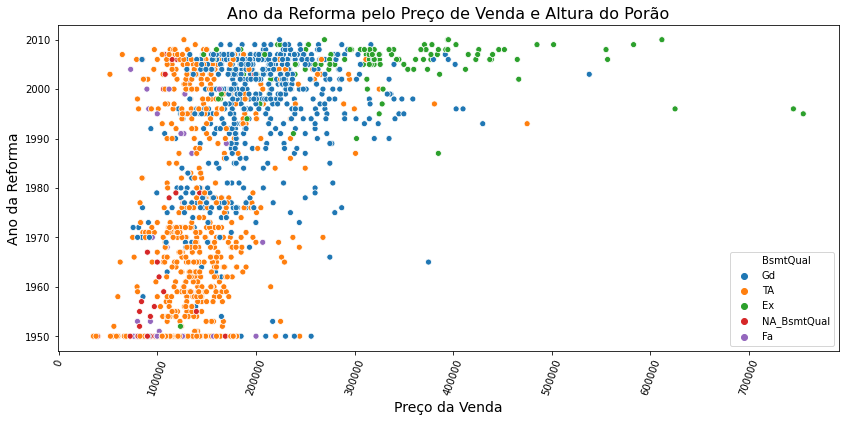

In [129]:
plt.figure(figsize=(14,6))
ax=sns.scatterplot(x=df_train.SalePrice, y=df_train.YearRemodAdd, hue=df_train.BsmtQual, data=df_train)
ax.xaxis.set_label_text("Preço da Venda", fontsize=14)
ax.yaxis.set_label_text("Ano da Reforma", fontsize=14)
ax.set_title("Ano da Reforma pelo Preço de Venda e Altura do Porão", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Esta coluna parece ser interessante para usarmos em nosso modelo preditivo. A pricípio vou testar ela do jeito que está, mas acredito que terei que ajustar os valores NA.</font><p>

## Condição geral do porão

In [130]:
df_train.BsmtCond.isnull().sum()

37

In [131]:
df_train.loc[df_train.BsmtCond.isnull() == True, "BsmtCond"] = "NA_BsmtCond"

In [132]:
df_train.BsmtCond.value_counts()

TA             1311
Gd               65
Fa               45
NA_BsmtCond      37
Po                2
Name: BsmtCond, dtype: int64

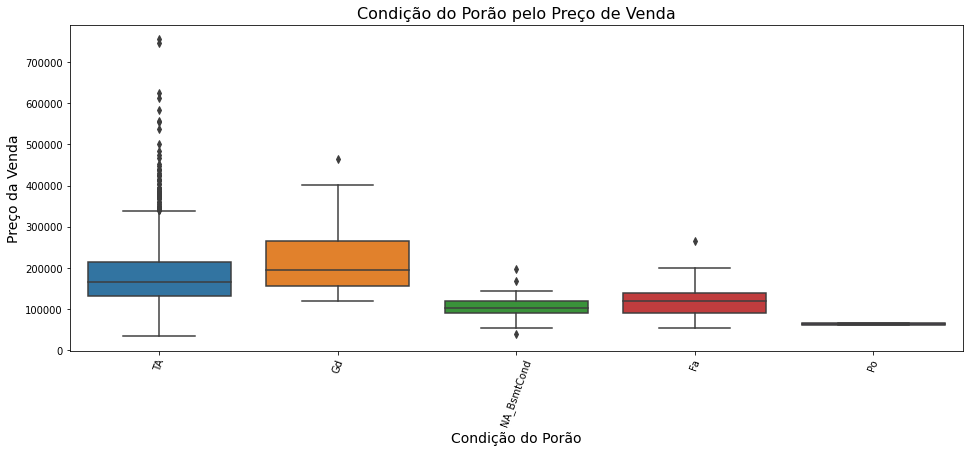

In [133]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.BsmtCond, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Condição do Porão", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Condição do Porão pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [134]:
df_train.loc[df_train.BsmtCond == 'Po', 'BsmtCond'] = 'Fa'

<p><font size="3.5">Essas variáveis que explicitam a condição de alguma parte da casa sempre é bom ser considerada, pois na hora da compra é isso que os clientes buscam. Casas com condições no mínimo apresentável.</font><p>

## Paredes subterrâneas no nível da entrada ou do jardim

In [135]:
df_train.BsmtExposure.isnull().sum()

38

In [136]:
df_train.loc[df_train.BsmtExposure.isnull() == True, "BsmtExposure"] = "NA_BsmtExposure"

In [137]:
df_train.BsmtExposure.value_counts()

No                 953
Av                 221
Gd                 134
Mn                 114
NA_BsmtExposure     38
Name: BsmtExposure, dtype: int64

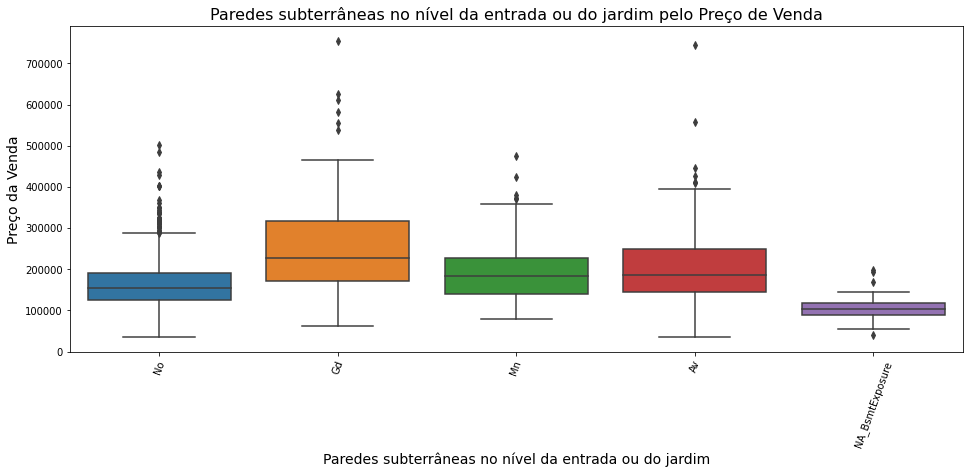

In [138]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.BsmtExposure, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Paredes subterrâneas no nível da entrada ou do jardim", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Paredes subterrâneas no nível da entrada ou do jardim pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Esta variável também parece ser interessante para o nosso modelo preditivo.</font><p>

## Qualidade da área acabada do porão

In [139]:
df_train.BsmtFinType1.isnull().sum()

37

In [140]:
df_train.loc[df_train.BsmtFinType1.isnull() == True, "BsmtFinType1"] = "NA_BsmtFinType1"

In [141]:
df_train.BsmtFinType1.value_counts()

Unf                430
GLQ                418
ALQ                220
BLQ                148
Rec                133
LwQ                 74
NA_BsmtFinType1     37
Name: BsmtFinType1, dtype: int64

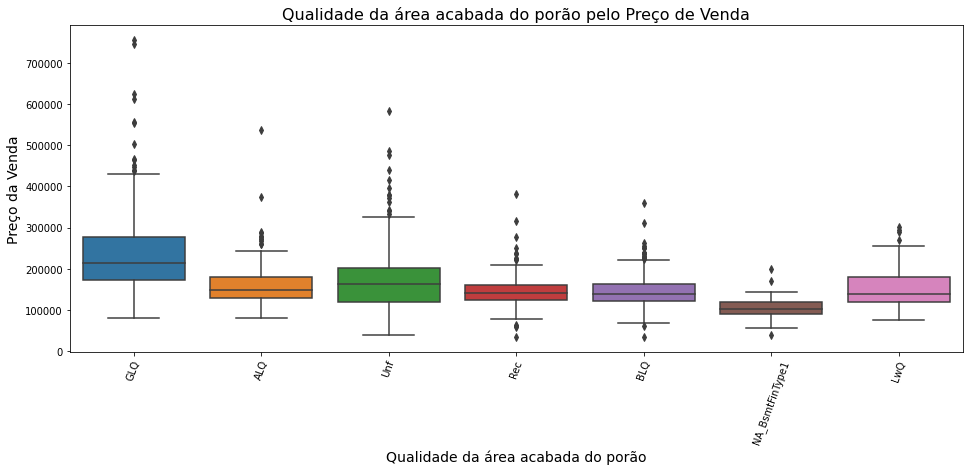

In [142]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.BsmtFinType1, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Qualidade da área acabada do porão", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Qualidade da área acabada do porão pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Esta variável também parece ser interessante para o nosso modelo preditivo.</font><p>

## Pés quadrados com acabamento tipo 1

In [143]:
df_train.BsmtFinSF1.isnull().sum()

0

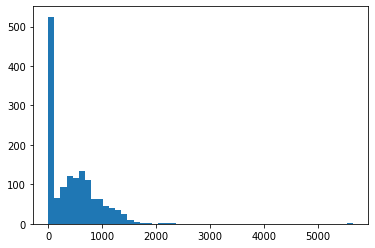

In [144]:
plt.hist(df_train.BsmtFinSF1, bins = 50)
plt.show()

In [145]:
df_train.loc[df_train.BsmtFinSF1 == 0, "BsmtFinSF1"].count()

467

In [146]:
df_train.loc[:, ["BsmtFinSF1", "SalePrice"]].corr()

,BsmtFinSF1,SalePrice
BsmtFinSF1,1.00000,0.38642
SalePrice,0.38642,1.00000


<p><font size="3.5">Esse dado também apresenta uma boa correlação, mas o alto número de valores 0 atrapalha na correlação com o valor das casas. Ele será utilizado em um primeiro momento, mas depois vou analizar melhor.</font><p>

## Qualidade da segunda área finalizada (se presente)

In [147]:
df_train.BsmtFinType2.isnull().sum()

38

In [148]:
df_train.loc[df_train.BsmtFinType2.isnull() == True, "BsmtFinType2"] = "NA_BsmtFinType2"

In [149]:
df_train.BsmtFinType2.value_counts()

Unf                1256
Rec                  54
LwQ                  46
NA_BsmtFinType2      38
BLQ                  33
ALQ                  19
GLQ                  14
Name: BsmtFinType2, dtype: int64

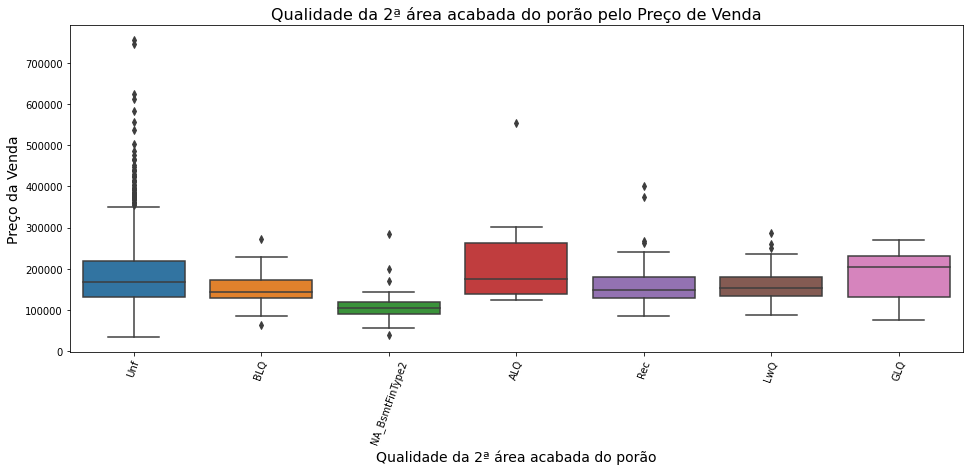

In [150]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.BsmtFinType2, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Qualidade da 2ª área acabada do porão", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Qualidade da 2ª área acabada do porão pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Como algumas casas não possuem uma segunda varanda e os dados estão mal distribuído não usarei essa variável.</font><p>

## Tipo 2 pés quadrados com acabamento

In [151]:
df_train.BsmtFinSF2.isnull().sum()

0

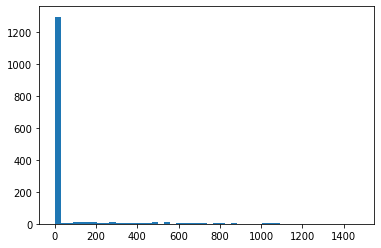

In [152]:
plt.hist(df_train.BsmtFinSF2, bins = 50)
plt.show()

In [153]:
df_train.loc[df_train.BsmtFinSF2 == 0, "BsmtFinSF1"].count()

1293

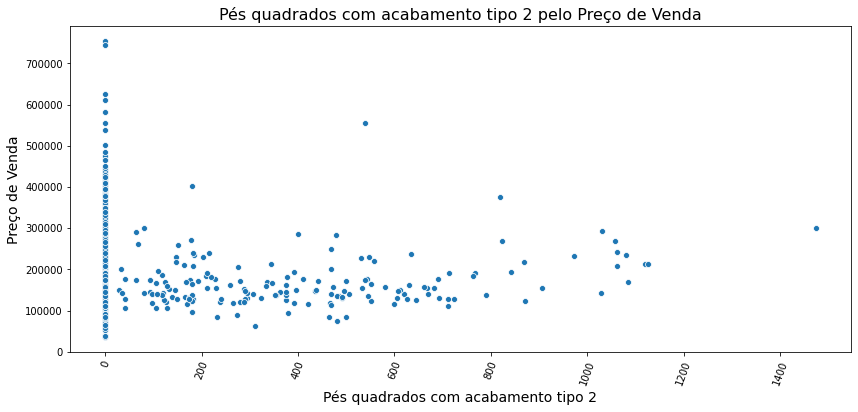

In [154]:
plt.figure(figsize=(14,6))
ax=sns.scatterplot(x=df_train.BsmtFinSF2, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Pés quadrados com acabamento tipo 2", fontsize=14)
ax.yaxis.set_label_text("Preço de Venda", fontsize=14)
ax.set_title("Pés quadrados com acabamento tipo 2 pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Esses valores não representam quase nada nesse gráfico, pois existem muitas casas que não tem uma segunda área acabada e isso acaba atrapalahndo bastante , pois ficamos com poucas amostras reais. Além de que se olharmo para o gráfico a faixa de preço é praticamente a mesma independentemente do tamanho do porão.</font><p>

## Pés quadrados inacabados da área do porão

In [155]:
df_train.BsmtUnfSF.isnull().sum()

0

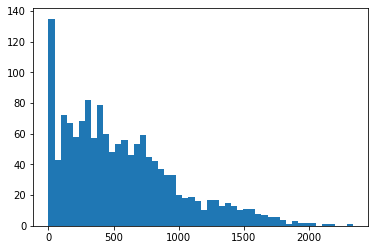

In [156]:
plt.hist(df_train.BsmtUnfSF, bins = 50)
plt.show()

<p><font size="3.5">Essa distribuição dos dados já me agrada um pouco mais.</font><p>

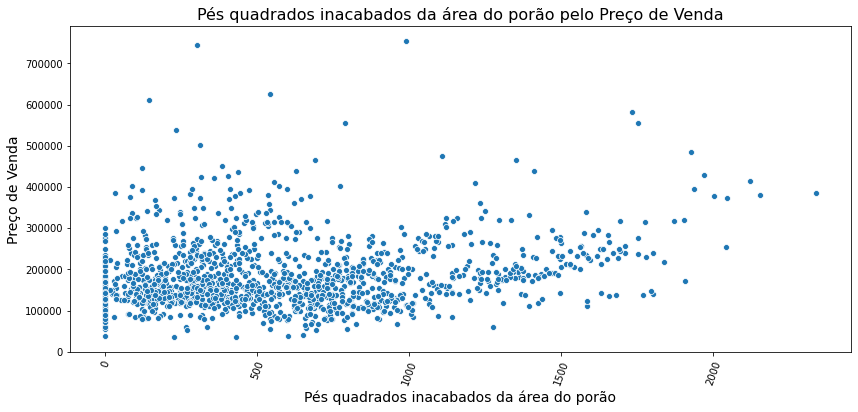

In [157]:
plt.figure(figsize=(14,6))
ax=sns.scatterplot(x=df_train.BsmtUnfSF, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Pés quadrados inacabados da área do porão", fontsize=14)
ax.yaxis.set_label_text("Preço de Venda", fontsize=14)
ax.set_title("Pés quadrados inacabados da área do porão pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [158]:
df_train.loc[:, ("BsmtUnfSF", "SalePrice")].corr()

,BsmtUnfSF,SalePrice
BsmtUnfSF,1.000000,0.214479
SalePrice,0.214479,1.000000


<p><font size="3.5">Existe uma correlação positiva com o valor das casas, por isso será considerado em meu modelo preditivo.</font><p>

## Pés quadrados totais da área do porão

In [159]:
df_train.TotalBsmtSF.isnull().sum()

0

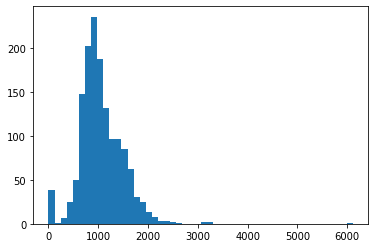

In [160]:
plt.hist(df_train.TotalBsmtSF, bins = 50)
plt.show()

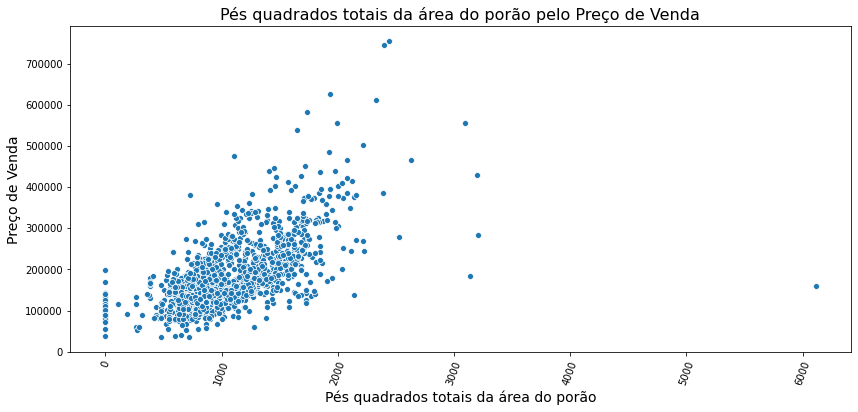

In [161]:
plt.figure(figsize=(14,6))
ax=sns.scatterplot(x=df_train.TotalBsmtSF, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Pés quadrados totais da área do porão", fontsize=14)
ax.yaxis.set_label_text("Preço de Venda", fontsize=14)
ax.set_title("Pés quadrados totais da área do porão pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [162]:
df_train.loc[:, ("TotalBsmtSF", "SalePrice")].corr()

,TotalBsmtSF,SalePrice
TotalBsmtSF,1.000000,0.613581
SalePrice,0.613581,1.000000


<p><font size="3.5">A área do porão é um item interessante para ser análisado no modelo, pois uma boa correlação com o valor da casa.</font><p>

## Tipo de aquecimento

In [163]:
df_train.Heating.isnull().sum()

0

In [164]:
df_train.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

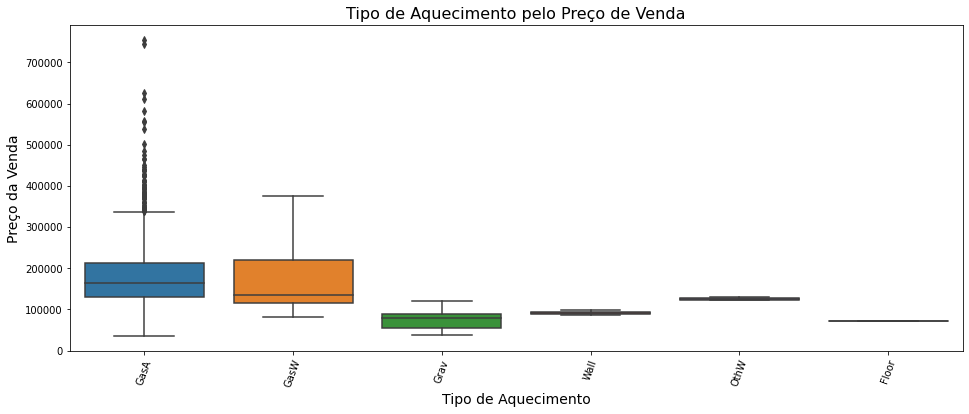

In [165]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.Heating, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Tipo de Aquecimento", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Tipo de Aquecimento pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Essa variável não compensa ser utilizada pelo fato de a maioria das casas terem como aquecimento o GasA, assim não da para fazer uma comparação razoável com os outros requisitos.</font><p>

## Qualidade e condição do aquecimento

In [166]:
df_train.HeatingQC.isnull().sum()

0

In [167]:
df_train.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

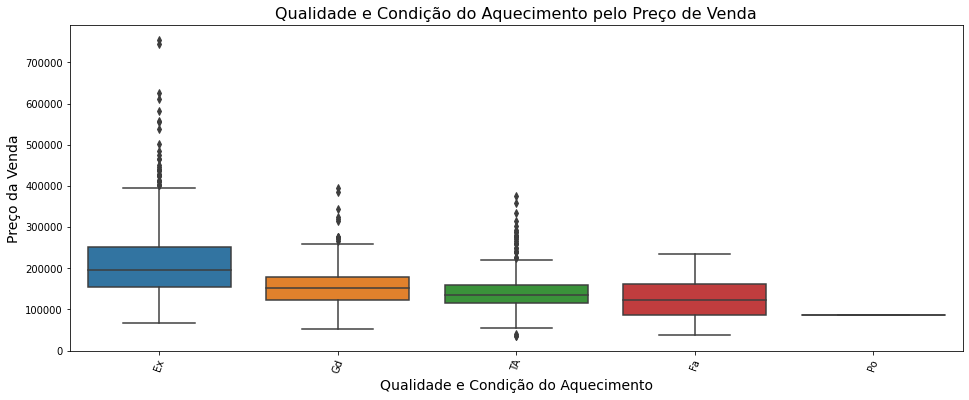

In [168]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.HeatingQC, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Qualidade e Condição do Aquecimento", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Qualidade e Condição do Aquecimento pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [169]:
df_train.loc[df_train.HeatingQC == 'Po', 'HeatingQC'] = 'Fa'

<p><font size="3.5">Esse é um item interessante para ser usado, pois como sabemos a condição de qualquer objeto da casa impacta à primeira vista o comprador e como esperavamos o preço das casas parecem diminuir a medida que a condição do aquecedor piora.</font><p>

## Ar condicionado central

In [170]:
df_train.CentralAir.isnull().sum()

0

In [171]:
df_train.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

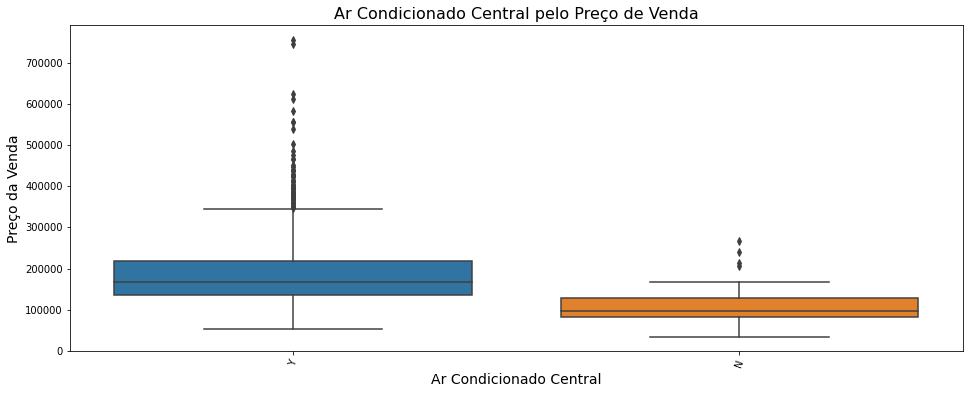

In [172]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.CentralAir, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Ar Condicionado Central", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Ar Condicionado Central pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Apesar dos dados estarem bem desbalanceados também acredito que esse é outro fator interessante para analisar na compra da casa, pois a diferença do preço médio deles muda bastante.</font><p>

## Sistema Elétrico

In [173]:
df_train.Electrical.isnull().sum()

1

In [174]:
df_train.loc[df_train.Electrical.isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [175]:
df_train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

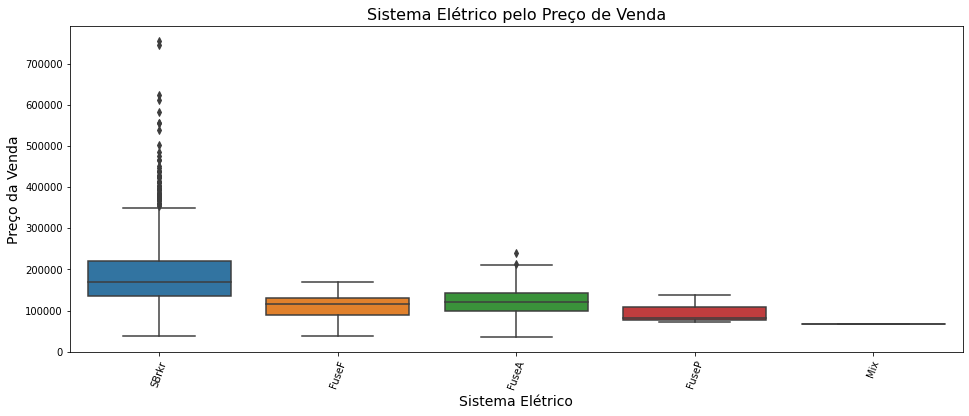

In [176]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.Electrical, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Sistema Elétrico", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Sistema Elétrico pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">O tipo de sistema elétrico parece influenciar um pouco no modelo, mas a princípio não usarei, pois não vejo uma influência muito forte.</font><p>

## Área do primeiro andar em pés quadrados

In [177]:
df_train['1stFlrSF'].isnull().sum()

0

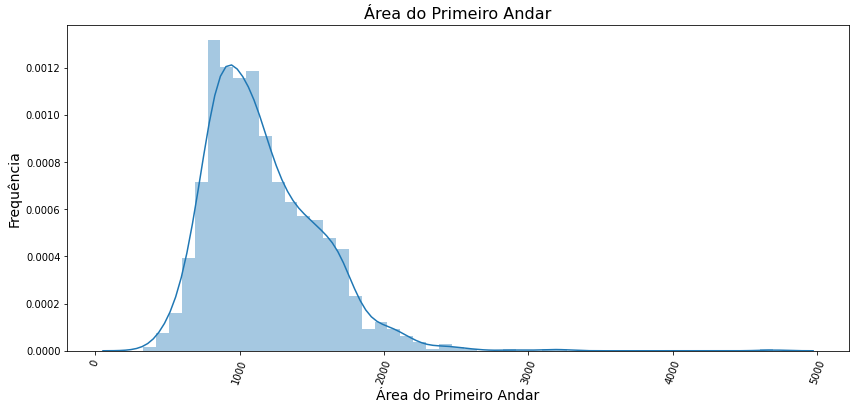

In [178]:
plt.figure(figsize=(14,6))
ax=sns.distplot(df_train['1stFlrSF'])
ax.xaxis.set_label_text("Área do Primeiro Andar", fontsize=14)
ax.yaxis.set_label_text("Frequência", fontsize=14)
ax.set_title("Área do Primeiro Andar", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [179]:
df_train['1stFlrSF'].mean()

1162.626712328767

In [180]:
import statistics as st
st.stdev(df_train['1stFlrSF'])

386.5877380410743

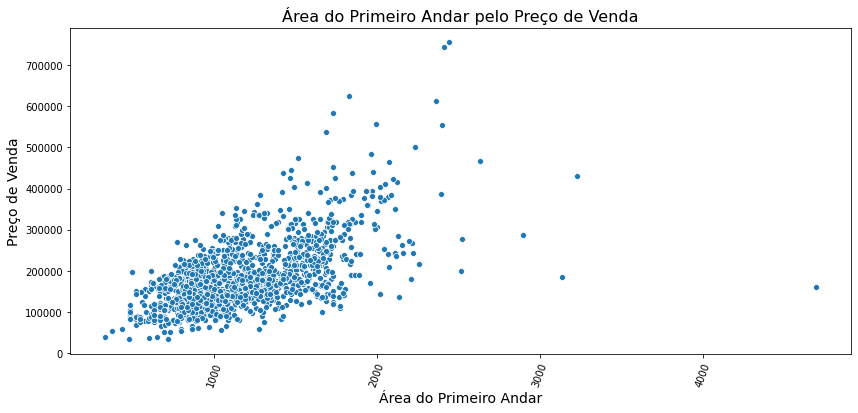

In [181]:
plt.figure(figsize=(14,6))
ax=sns.scatterplot(x=df_train['1stFlrSF'], y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Área do Primeiro Andar", fontsize=14)
ax.yaxis.set_label_text("Preço de Venda", fontsize=14)
ax.set_title("Área do Primeiro Andar pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [182]:
df_train.loc[:, ['1stFlrSF', 'SalePrice']].corr()

,1stFlrSF,SalePrice
1stFlrSF,1.000000,0.605852
SalePrice,0.605852,1.000000


<p><font size="3.5">Como ja era de se esperar a área do primeiro andar tem um boa correlação positiva em relação ao preço da casa, portanto será usada em nosso modelo preditivo.</font><p>

## Área do segundo andar em pés quadrados

In [183]:
df_train['2ndFlrSF'].isnull().sum()

0

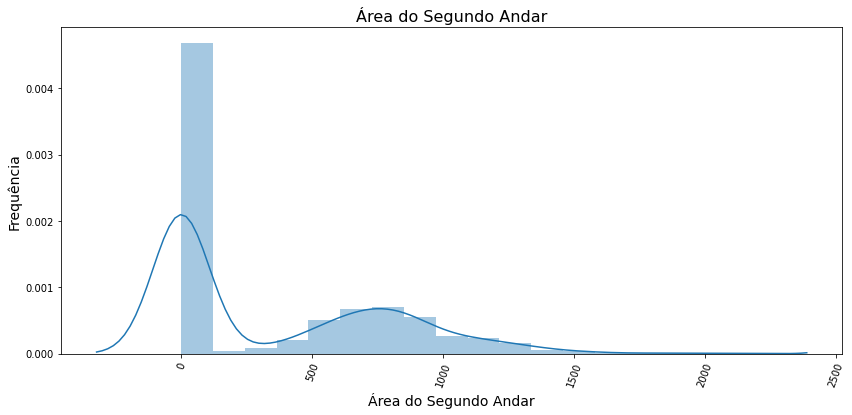

In [184]:
plt.figure(figsize=(14,6))
ax=sns.distplot(df_train['2ndFlrSF'])
ax.xaxis.set_label_text("Área do Segundo Andar", fontsize=14)
ax.yaxis.set_label_text("Frequência", fontsize=14)
ax.set_title("Área do Segundo Andar", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [185]:
df_train['2ndFlrSF'].mean()

346.99246575342465

In [186]:
df_train.loc[df_train['2ndFlrSF']==0, ['2ndFlrSF']].count()

2ndFlrSF    829
dtype: int64

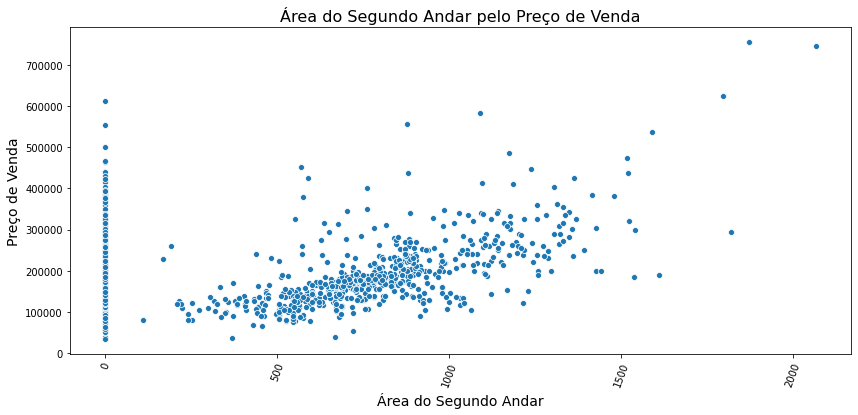

In [187]:
plt.figure(figsize=(14,6))
ax=sns.scatterplot(x=df_train['2ndFlrSF'], y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Área do Segundo Andar", fontsize=14)
ax.yaxis.set_label_text("Preço de Venda", fontsize=14)
ax.set_title("Área do Segundo Andar pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [188]:
df_train.loc[:, ['2ndFlrSF', 'SalePrice']].corr()

,2ndFlrSF,SalePrice
2ndFlrSF,1.000000,0.319334
SalePrice,0.319334,1.000000


In [189]:
df_train.loc[df_train['2ndFlrSF']!=0, ['2ndFlrSF', 'SalePrice']].corr()

,2ndFlrSF,SalePrice
2ndFlrSF,1.000000,0.673305
SalePrice,0.673305,1.000000


<p><font size="3.5">Esses dados também serão utilizados, mas tem um resalva a se fazer. Existem casas com apenas 1 andar com os mais variados tipos de valor. Mas se olharmos a correlação sem esse tipo de casa, ela é até mais forte do que a área do primeiro andar.</font><p>

## Área acabada de baixa qualidade

In [190]:
df_train['LowQualFinSF'].isnull().sum()

0

In [191]:
df_train.loc[df_train['LowQualFinSF']==0, ['2ndFlrSF']].count()

2ndFlrSF    1434
dtype: int64

In [192]:
df_train.shape

(1460, 81)

<p><font size="3.5">Esses dados nem vale a pena ser explorado, pois existem poucas casas com acabamento de baixa qualidade pelo que podemos observar.</font><p>

## Área útil acima do nível do solo

In [193]:
df_train['GrLivArea'].isnull().sum()

0

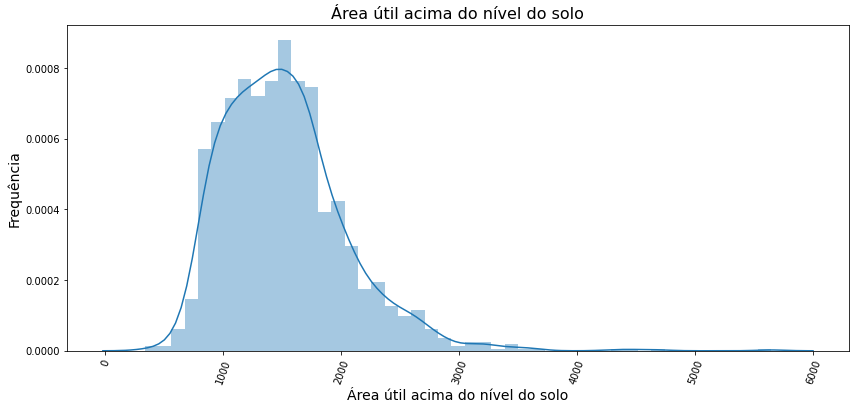

In [194]:
plt.figure(figsize=(14,6))
ax=sns.distplot(df_train['GrLivArea'])
ax.xaxis.set_label_text("Área útil acima do nível do solo", fontsize=14)
ax.yaxis.set_label_text("Frequência", fontsize=14)
ax.set_title("Área útil acima do nível do solo", fontsize=16)
plt.xticks(rotation=70)
plt.show()

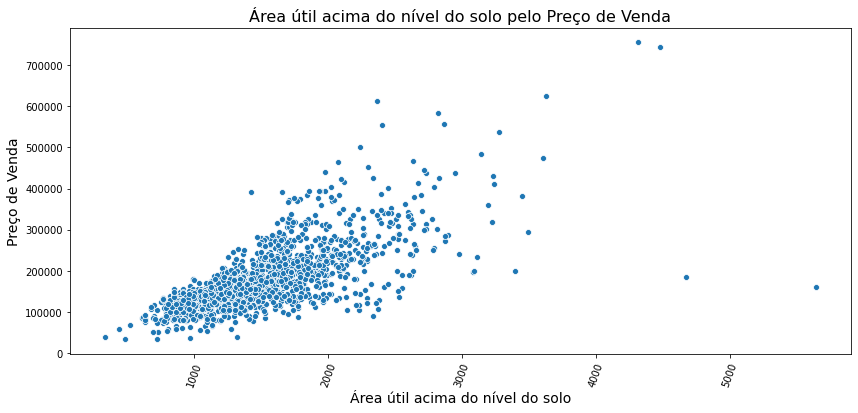

In [195]:
plt.figure(figsize=(14,6))
ax=sns.scatterplot(x=df_train['GrLivArea'], y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Área útil acima do nível do solo", fontsize=14)
ax.yaxis.set_label_text("Preço de Venda", fontsize=14)
ax.set_title("Área útil acima do nível do solo pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [196]:
df_train.loc[:, ['GrLivArea', 'SalePrice']].corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


<p><font size="3.5">A área util é o fator que até agora nos deu a melhor correlação com o valor das casas até o momento, portanto será utilizada.</font><p>

## Banheiros completos no porão

In [197]:
df_train['BsmtFullBath'].isnull().sum()

0

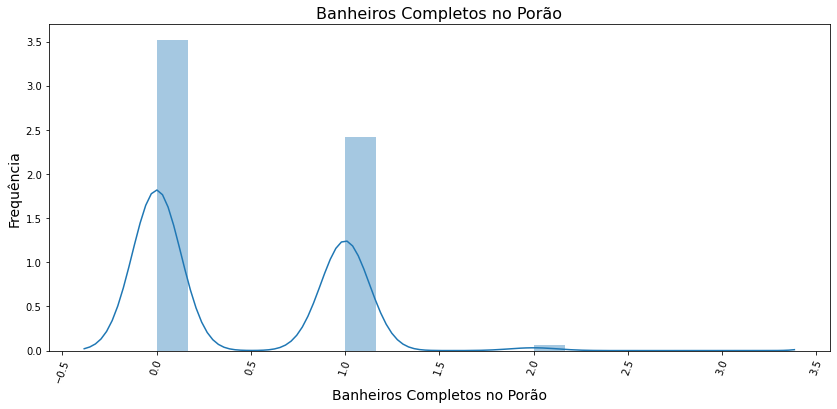

In [198]:
plt.figure(figsize=(14,6))
ax=sns.distplot(df_train['BsmtFullBath'])
ax.xaxis.set_label_text("Banheiros Completos no Porão", fontsize=14)
ax.yaxis.set_label_text("Frequência", fontsize=14)
ax.set_title("Banheiros Completos no Porão", fontsize=16)
plt.xticks(rotation=70)
plt.show()

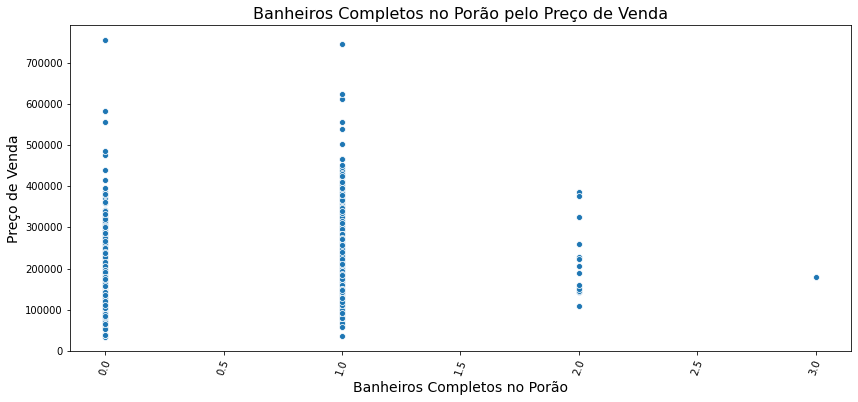

In [199]:
plt.figure(figsize=(14,6))
ax=sns.scatterplot(x=df_train['BsmtFullBath'], y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Banheiros Completos no Porão", fontsize=14)
ax.yaxis.set_label_text("Preço de Venda", fontsize=14)
ax.set_title("Banheiros Completos no Porão pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Como podemos ver nos gráfios acima o número de banheiro do porão não influenciam de forma muito forte o preço das casas. Talvez isso ocorre pelo fato do número de banheiros ser muito baixo.</font><p>

## Lavabos no porão

In [200]:
df_train['BsmtHalfBath'].isnull().sum()

0

In [201]:
df_train['BsmtHalfBath'].value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

<p><font size="3.5">Esse é outro fator que nem vale apena explorar pelos poucos dados que estão oferecidos.</font><p>

## Banheros Acima do Porão

In [202]:
df_train['FullBath'].isnull().sum()

0

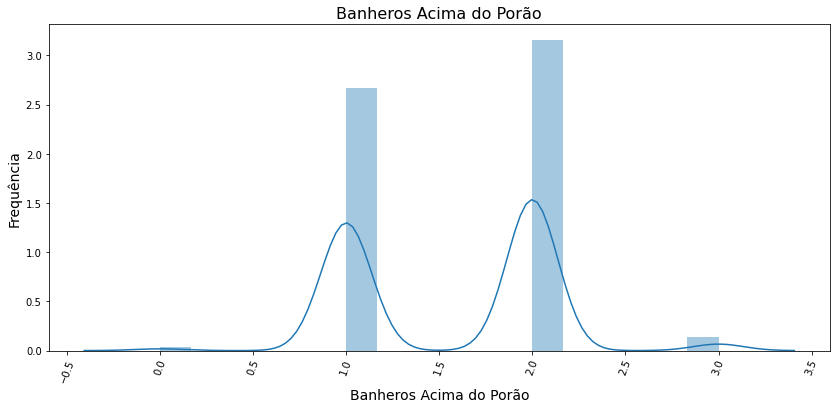

In [203]:
plt.figure(figsize=(14,6))
ax=sns.distplot(df_train['FullBath'])
ax.xaxis.set_label_text("Banheros Acima do Porão", fontsize=14)
ax.yaxis.set_label_text("Frequência", fontsize=14)
ax.set_title("Banheros Acima do Porão", fontsize=16)
plt.xticks(rotation=70)
plt.show()

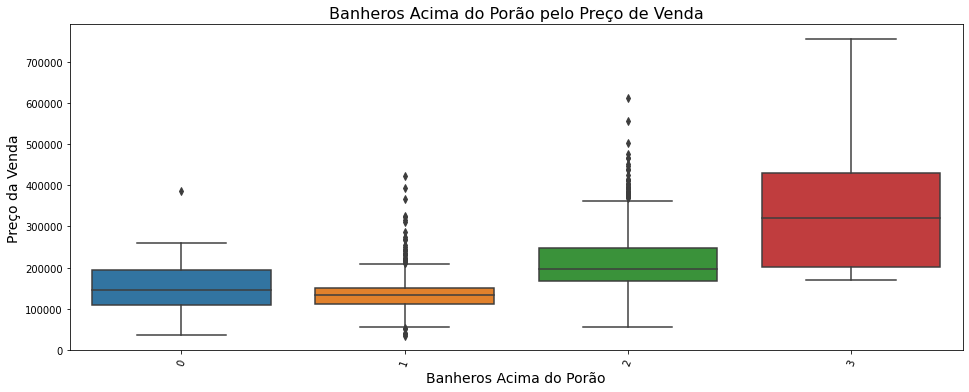

In [204]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.FullBath, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Banheros Acima do Porão", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Banheros Acima do Porão pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">O número de banheiros da parte de cima da casa influencia no valor como podemos ver, mas e se somarmos os banheiros do porão e da casa, será que obtemos uma relação melhor?</font><p> 

## Total de Banheiros

In [205]:
df_train["total_Bath"] = df_train.BsmtFullBath + df_train.FullBath

In [206]:
df_train['total_Bath'].isnull().sum()

0

In [207]:
df_train['total_Bath'].value_counts()

2    750
1    371
3    319
4     18
6      1
0      1
Name: total_Bath, dtype: int64

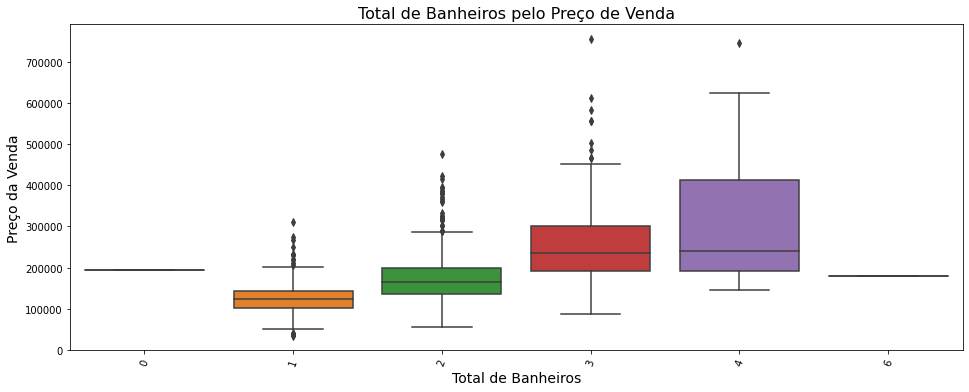

In [208]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.total_Bath, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Total de Banheiros", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Total de Banheiros pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [209]:
df_train.loc[:, ["total_Bath", "SalePrice"]].corr()

,total_Bath,SalePrice
total_Bath,1.000000,0.582934
SalePrice,0.582934,1.000000


<p><font size="3.5">Essa variável apresenta uma boa correlação com o valor das casas.</font><p>

## Lavabos Acima do Porão

In [210]:
df_train['HalfBath'].isnull().sum()

0

In [211]:
df_train['HalfBath'].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

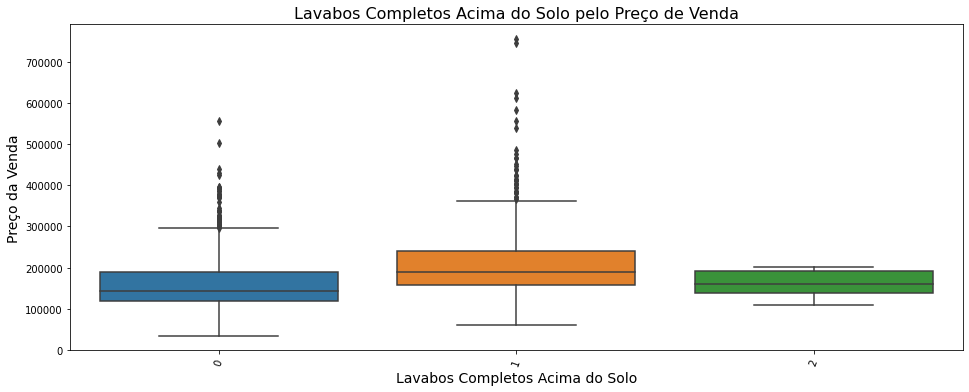

In [212]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.HalfBath, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Lavabos Completos Acima do Solo", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Lavabos Completos Acima do Solo pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Casas que têm 1 lavabo acima do porão tendem a ter uma média de preço maior.</font><p>

## Total de Lavabos

In [213]:
df_train["total_HalfBath"] = df_train.BsmtHalfBath + df_train.HalfBath

In [214]:
df_train["total_HalfBath"].isnull().sum()

0

In [215]:
df_train['total_HalfBath'].value_counts()

0    855
1    572
2     29
3      3
4      1
Name: total_HalfBath, dtype: int64

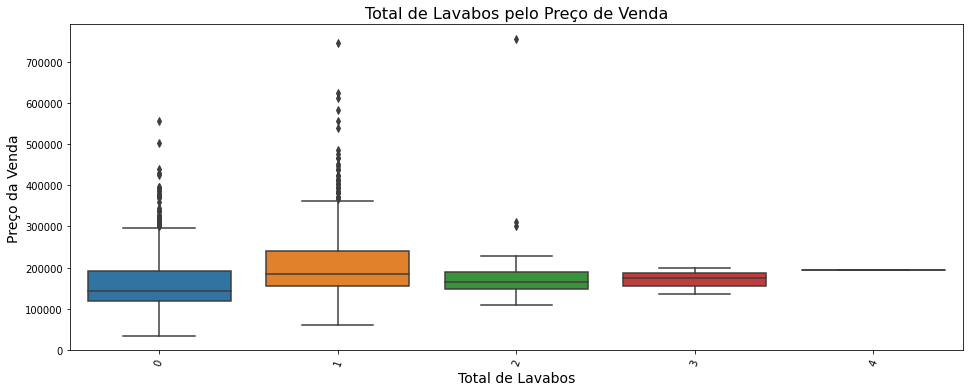

In [216]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.total_HalfBath, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Total de Lavabos", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Total de Lavabos pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [217]:
df_train.loc[:, ["total_HalfBath", "SalePrice"]].corr()

,total_HalfBath,SalePrice
total_HalfBath,1.000000,0.250628
SalePrice,0.250628,1.000000


<p><font size="3.5">Apesar da pequena correlação, o total de lavabos será utilizado no meu primeiro modelo preditivo.</font><p>

## Número de Quartos Acima do Porão

In [218]:
df_train['BedroomAbvGr'].isnull().sum()

0

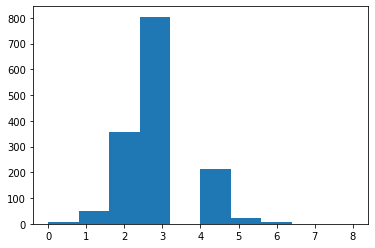

In [219]:
plt.hist(df_train['BedroomAbvGr'])
plt.show()

In [220]:
df_train['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

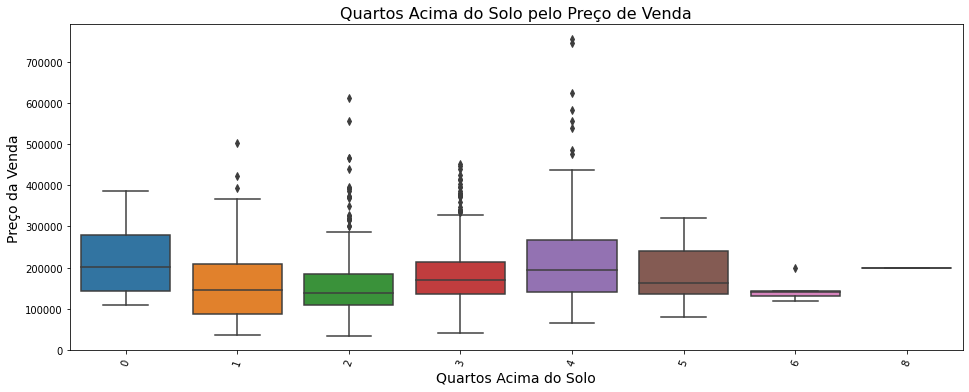

In [221]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.BedroomAbvGr, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Quartos Acima do Solo", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Quartos Acima do Solo pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [222]:
df_train.loc[:, ['BedroomAbvGr', 'SalePrice']].corr()

,BedroomAbvGr,SalePrice
BedroomAbvGr,1.000000,0.168213
SalePrice,0.168213,1.000000


<p><font size="3.5">Apesar da baixa correlação, também utilizarei essa variável em meu modelo preditivo.</font><p>

## Número de cozinhas

In [223]:
df_train['KitchenAbvGr'].isnull().sum()

0

In [224]:
df_train['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

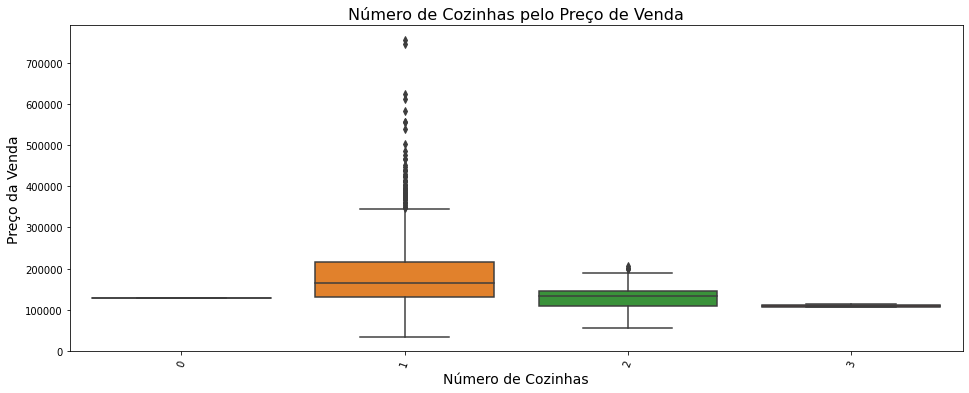

In [225]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.KitchenAbvGr, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Número de Cozinhas", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Número de Cozinhas pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Não faz muito sentido essa variável, já que a maioria das casas têm apenas uma cozinha</font><p>

## Qualidade da Cozinha

In [226]:
df_train['KitchenQual'].isnull().sum()

0

In [227]:
df_train['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

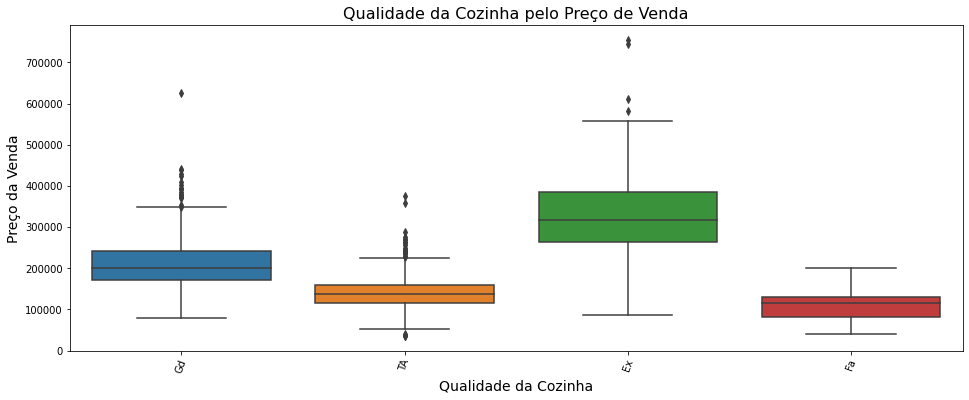

In [228]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.KitchenQual, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Qualidade da Cozinha", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Qualidade da Cozinha pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Esse item parece ser bem interssante para o nosso modelo preditivo. Vou utilizá-lo.</font><p>

## Total de Comodos Acima do Porão

In [229]:
df_train['TotRmsAbvGrd'].isnull().sum()

0

In [230]:
df_train['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

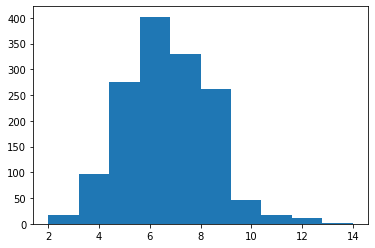

In [231]:
plt.hist(df_train['TotRmsAbvGrd'])
plt.show()

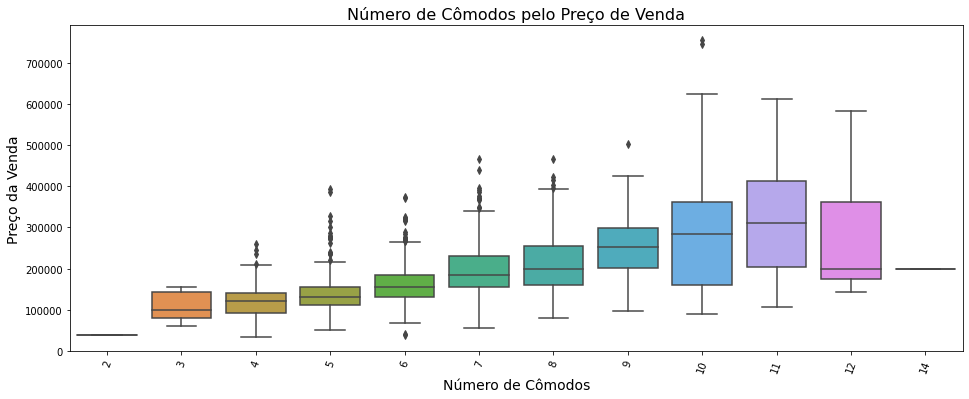

In [232]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.TotRmsAbvGrd, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Número de Cômodos", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Número de Cômodos pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [233]:
df_train.loc[:, ['TotRmsAbvGrd', 'SalePrice']].corr()

,TotRmsAbvGrd,SalePrice
TotRmsAbvGrd,1.000000,0.533723
SalePrice,0.533723,1.000000


<p><font size="3.5">Casas que possuem mais cômodos normalmente são mais caras do que casas com menos cômodos</font><p>

## Classificação de funcionalidade doméstica

In [234]:
df_train['Functional'].isnull().sum()

0

In [235]:
df_train['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

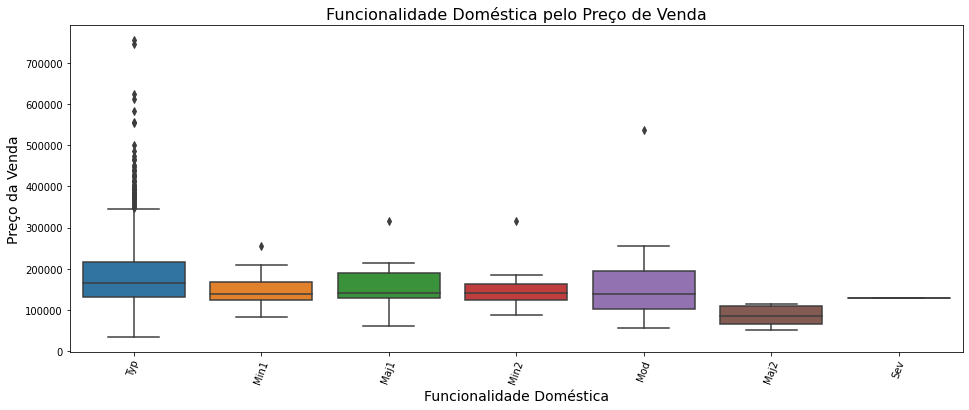

In [236]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.Functional, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Funcionalidade Doméstica", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Funcionalidade Doméstica pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Este item parece interessante, mas não usarei pois os dados estão muito desbalanceados.</font><p>

## Número de lareiras

In [237]:
df_train['Fireplaces'].isnull().sum()

0

In [238]:
df_train['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

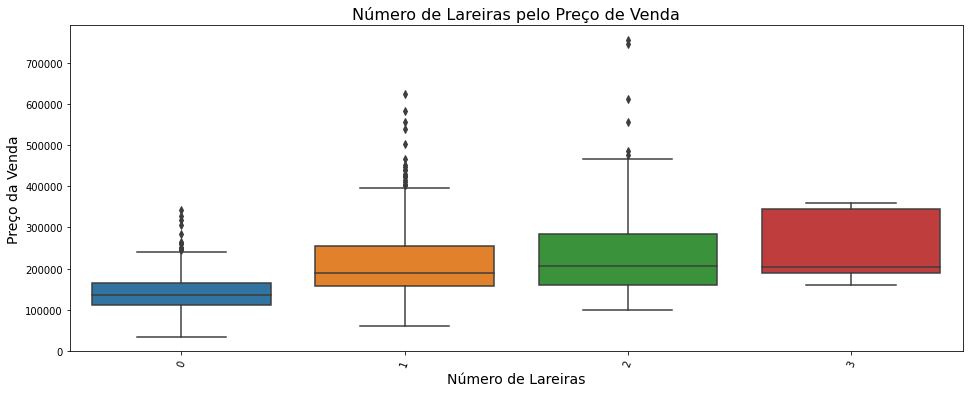

In [239]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.Fireplaces, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Número de Lareiras", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Número de Lareiras pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [240]:
df_train.loc[:, ['Fireplaces', 'SalePrice']].corr()

,Fireplaces,SalePrice
Fireplaces,1.000000,0.466929
SalePrice,0.466929,1.000000


<p><font size="3.5">O número de lareiras é um item bem interessante para ser explorado, pois percebemos que o preço aumenta a medida que o número de lareiras aumenta também</font><p>

## Qualidade das Lareiras

In [241]:
df_train['FireplaceQu'].isnull().sum()

690

In [242]:
df_train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<p><font size="3.5">Nesta variável existem 690 dados nulos, eles são referentes as casas que não possuem lareiras. Vou criar um novo atributo NA (Não aplicável) para eles</font><p>

In [243]:
df_train.loc[df_train['FireplaceQu'].isnull()==True, 'FireplaceQu'] = 'NA_FireplaceQu'

In [244]:
df_train['FireplaceQu'].value_counts()

NA_FireplaceQu    690
Gd                380
TA                313
Fa                 33
Ex                 24
Po                 20
Name: FireplaceQu, dtype: int64

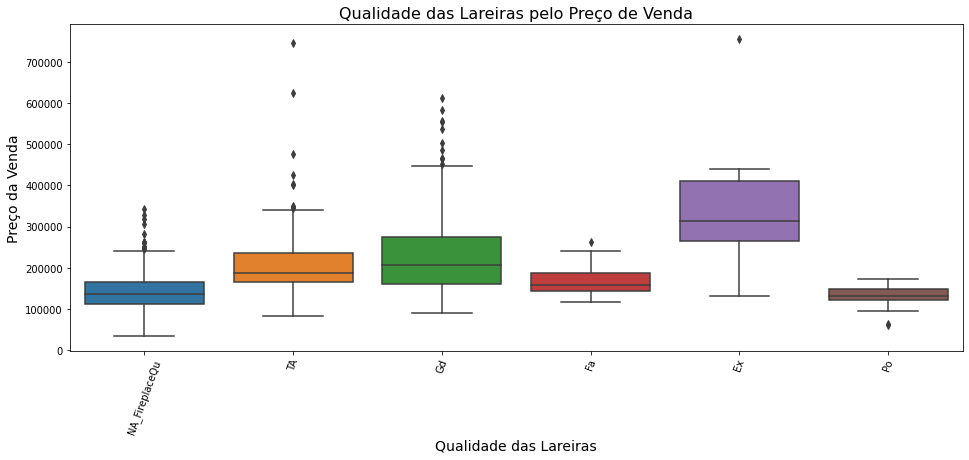

In [245]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.FireplaceQu, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Qualidade das Lareiras", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Qualidade das Lareiras pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Essa variável nos parece influenciar bastante na decisão do modelo preditivo. Vou utilizá-la</font><p>

## Localização da Garagem

In [246]:
df_train['GarageType'].isnull().sum()

81

In [247]:
df_train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<p><font size="3.5">Esta variável também possui valores nulos para os casos em que não têm garagem. Vou colocar como NA também.</font><p>

In [248]:
df_train.loc[df_train['GarageType'].isnull()==True, 'GarageType'] = 'NA_GarageType'

In [249]:
df_train['GarageType'].value_counts()

Attchd           870
Detchd           387
BuiltIn           88
NA_GarageType     81
Basment           19
CarPort            9
2Types             6
Name: GarageType, dtype: int64

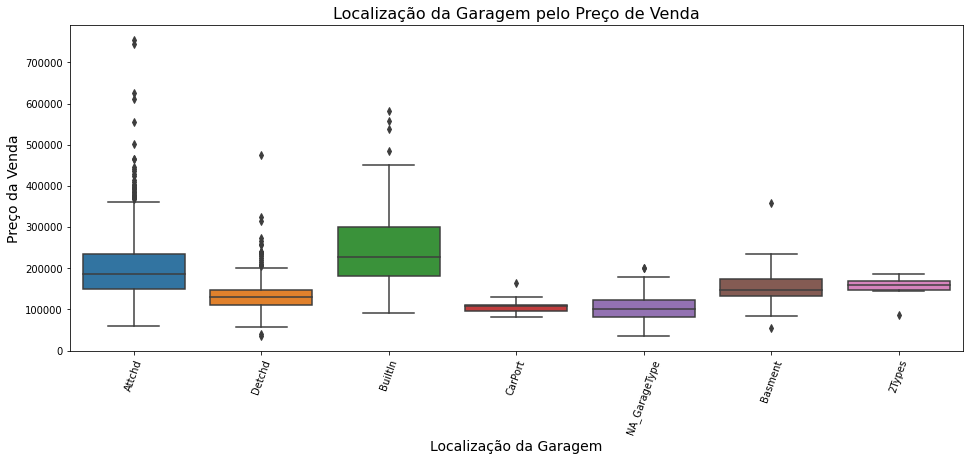

In [250]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.GarageType, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Localização da Garagem", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Localização da Garagem pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [251]:
df_train.loc[df_train.GarageType == '2Types', 'GarageType'] = 'Basment'
df_train.loc[df_train.GarageType == 'CarPort', 'GarageType'] = 'Detchd'

<p><font size="3.5">Os tipos de garagem também influenciam no modelo preditivo, portanto serão utilizadas</font><p>

## Ano de construção da Garagem

In [252]:
df_train['GarageYrBlt'].isnull().sum()

81

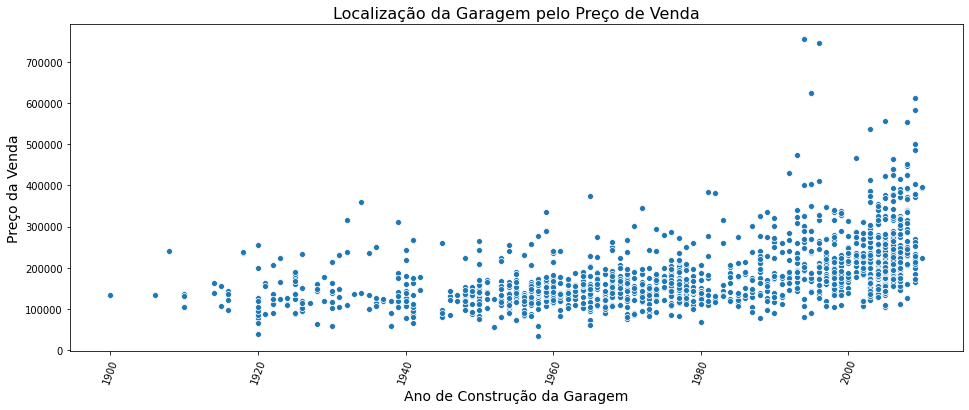

In [253]:
plt.figure(figsize=(16,6))
ax=sns.scatterplot(x=df_train.GarageYrBlt, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Ano de Construção da Garagem", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Localização da Garagem pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [254]:
df_train.loc[:, ['GarageYrBlt', 'SalePrice']].corr()

,GarageYrBlt,SalePrice
GarageYrBlt,1.000000,0.486362
SalePrice,0.486362,1.000000


<p><font size="3.5">Precisamos tratar os dados missing. Vou colocar o ano de construção da garagem igual à média dos anos de construção, mesmo não sendo aplicável.</font><p>

In [255]:
df_train.loc[df_train['GarageYrBlt'].isnull()==True, 'GarageYrBlt'] = round(df_train.GarageYrBlt.mean())

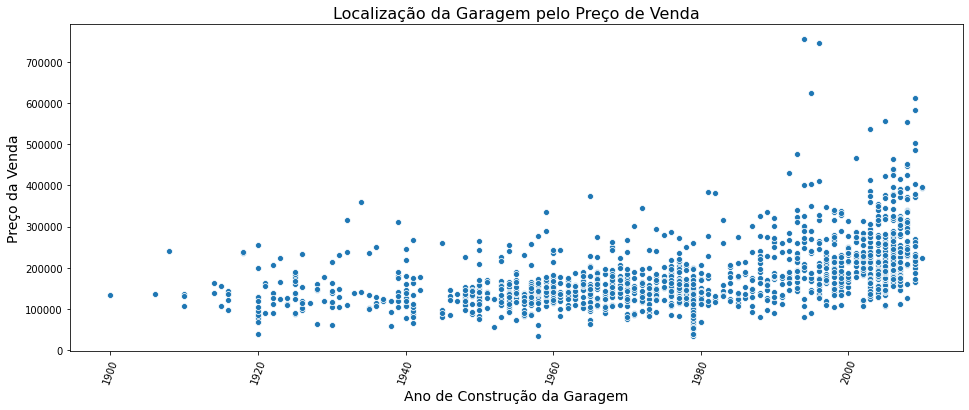

In [256]:
plt.figure(figsize=(16,6))
ax=sns.scatterplot(x=df_train.GarageYrBlt, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Ano de Construção da Garagem", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Localização da Garagem pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [257]:
df_train.loc[:, ['GarageYrBlt', 'SalePrice']].corr()

,GarageYrBlt,SalePrice
GarageYrBlt,1.000000,0.469056
SalePrice,0.469056,1.000000


<p><font size="3.5">A correlação com a variável preço não alterou muito, então creio que a decisão tomada foi correta.</font><p>

## Acabamento interior da garagem

In [258]:
df_train['GarageFinish'].isnull().sum()

81

In [259]:
df_train.loc[df_train['GarageFinish'].isnull()==True, 'GarageFinish'] = 'NA_GarageFinish'

In [260]:
df_train['GarageFinish'].value_counts()

Unf                605
RFn                422
Fin                352
NA_GarageFinish     81
Name: GarageFinish, dtype: int64

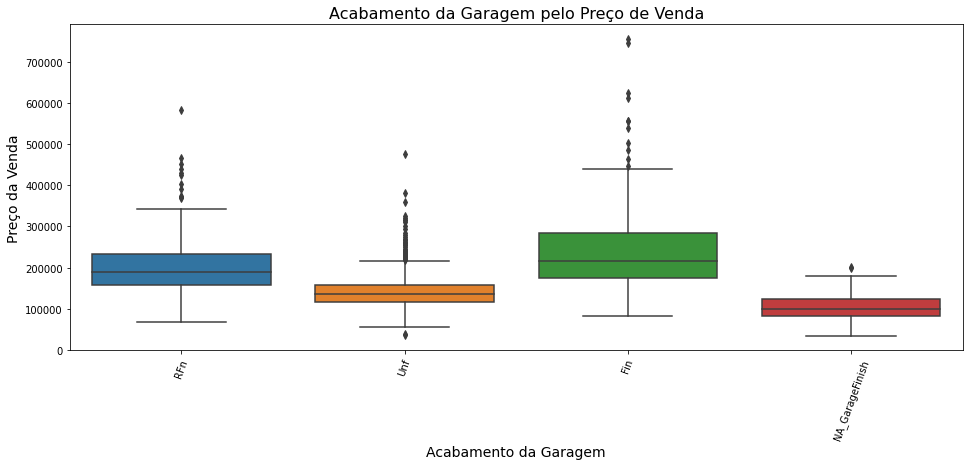

In [261]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.GarageFinish, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Acabamento da Garagem", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Acabamento da Garagem pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Essa variável também é interessante para o modelo preditivo.</font><p>

## Tamanho da garagem em capacidade do carro

In [262]:
df_train['GarageCars'].isnull().sum()

0

In [263]:
df_train.loc[df_train['GarageCars'].isnull()==True, 'GarageCars'] = 0

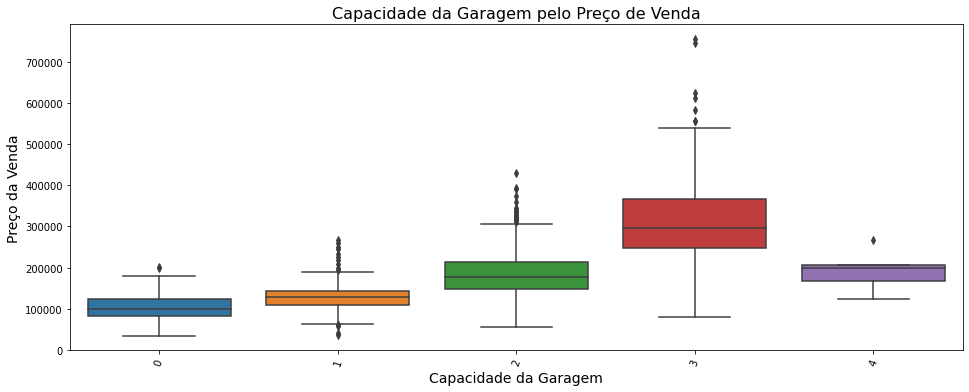

In [264]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.GarageCars, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Capacidade da Garagem", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Capacidade da Garagem pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [265]:
df_train.loc[:, ['GarageCars', 'SalePrice']].corr()

,GarageCars,SalePrice
GarageCars,1.000000,0.640409
SalePrice,0.640409,1.000000


<p><font size="3.5">Essa variável possui uma boa correlação com o valor da casa, por isso será utilizada.</font><p>

## Tamanho da Garagem em Pés Quadrados

In [266]:
df_train['GarageArea'].isnull().sum()

0

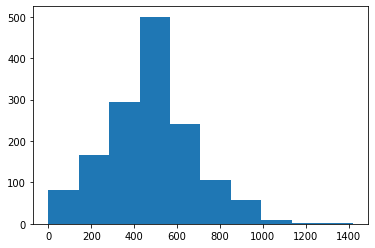

In [267]:
plt.hist(df_train['GarageArea'])
plt.show()

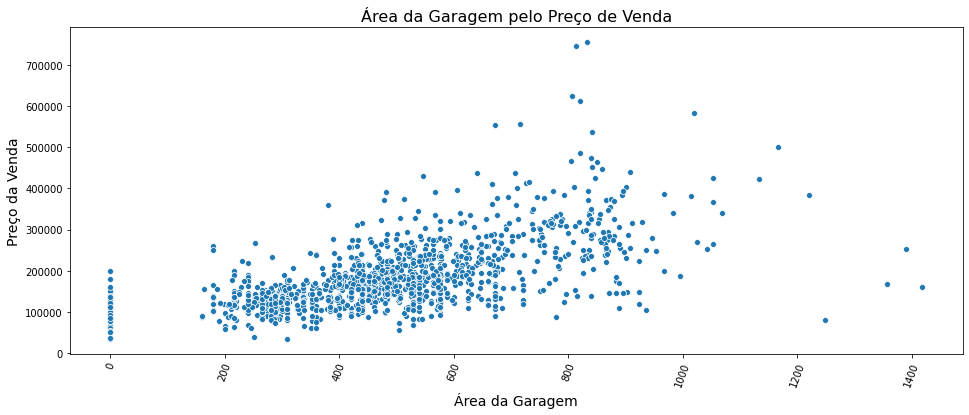

In [268]:
plt.figure(figsize=(16,6))
ax=sns.scatterplot(x=df_train.GarageArea, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Área da Garagem", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Área da Garagem pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [269]:
df_train.loc[:, ['GarageArea', 'SalePrice']].corr()

,GarageArea,SalePrice
GarageArea,1.000000,0.623431
SalePrice,0.623431,1.000000


<p><font size="3.5">A área da garagem tem uma boa correlação positiva com o preço das casas.</font><p>

## Qualidade da Garagem

In [270]:
df_train['GarageQual'].isnull().sum()

81

In [271]:
df_train.loc[df_train['GarageQual'].isnull()==True, 'GarageQual'] = 'NA'

In [272]:
df_train['GarageQual'].value_counts()

TA    1311
NA      81
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

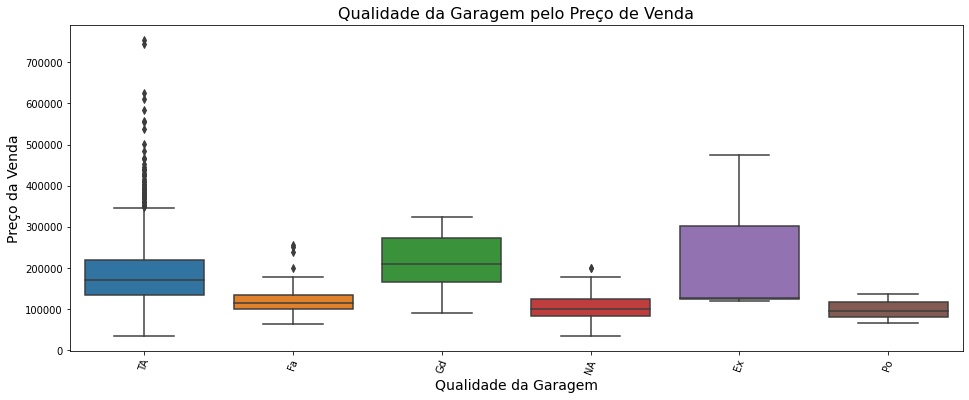

In [273]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.GarageQual, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Qualidade da Garagem", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Qualidade da Garagem pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Como esses dados estão muito desbalanceados não utilizarei em meu modelo preditivo.</font><p>

## Condição de garagem

In [274]:
df_train['GarageCond'].isnull().sum()

81

In [275]:
df_train.loc[df_train['GarageCond'].isnull()==True, 'GarageCond'] = 'NA'

In [276]:
df_train['GarageCond'].value_counts()

TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

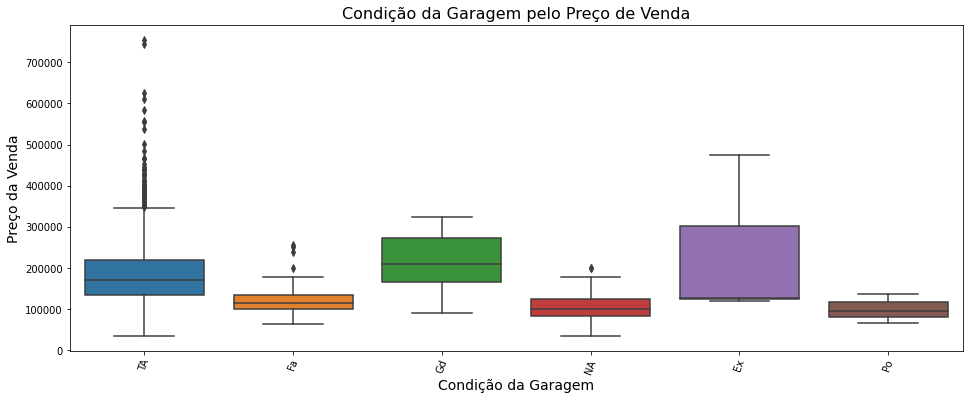

In [277]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.GarageQual, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Condição da Garagem", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Condição da Garagem pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Esses dados expressão quase a mesma coisa da variável, mas não vou utilizar devido ao desbalanceamento exagerado deles.</font><p>

## Entrada de automóveis pavimentada

In [278]:
df_train['PavedDrive'].isnull().sum()

0

In [279]:
df_train['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

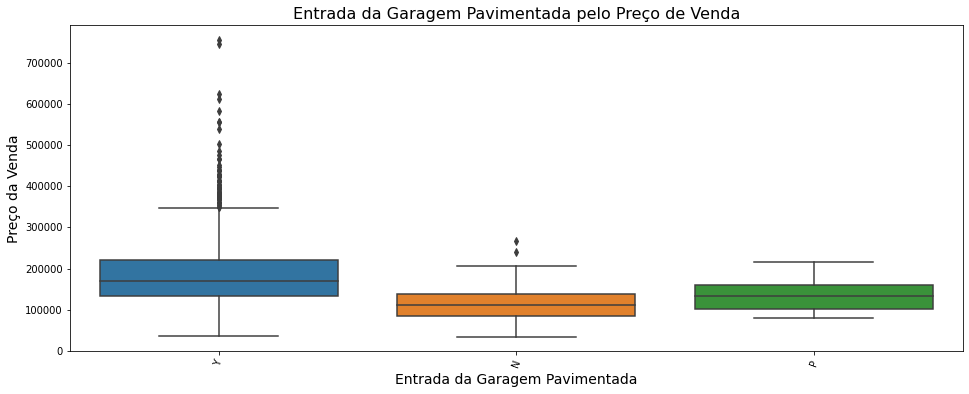

In [280]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.PavedDrive, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Entrada da Garagem Pavimentada", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Entrada da Garagem Pavimentada pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Apesar desses dados também estarem bem desbalanceados vou utilizar no modelo incialmente.</font><p>

## Áea do deck de madeira em pés quadrados

In [281]:
df_train['WoodDeckSF'].isnull().sum()

0

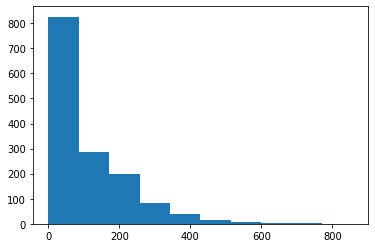

In [282]:
plt.hist(df_train['WoodDeckSF'])
plt.show()

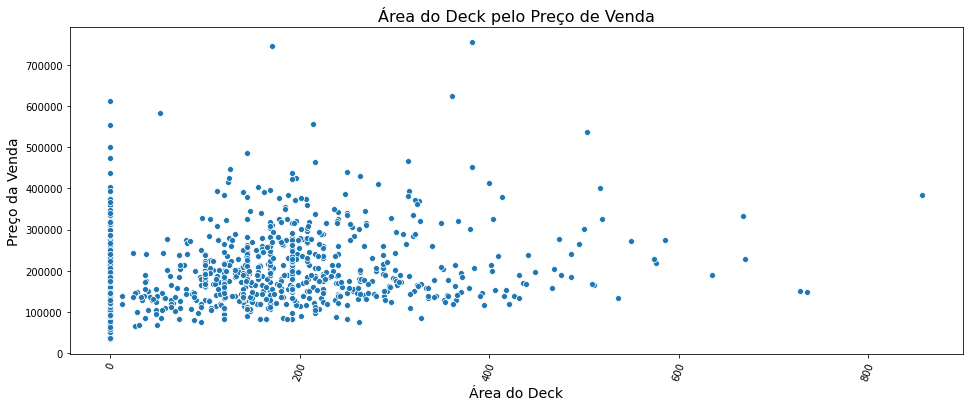

In [283]:
plt.figure(figsize=(16,6))
ax=sns.scatterplot(x=df_train.WoodDeckSF, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Área do Deck", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Área do Deck pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [284]:
df_train.loc[:, ['WoodDeckSF', 'SalePrice']].corr()

,WoodDeckSF,SalePrice
WoodDeckSF,1.000000,0.324413
SalePrice,0.324413,1.000000


In [285]:
df_train.loc[df_train['WoodDeckSF']==0, 'WoodDeckSF'].count()

761

<p><font size="3.5">Apesar da correlação positiva entre esses dados eu acredito que o alto número de área igual a 0 irá influenciar negativamente em meu algoritmo. Incialmente não irei utilizar esta variável</font><p>

## Área da varanda aberta em pés quadrados

In [286]:
df_train['OpenPorchSF'].isnull().sum()

0

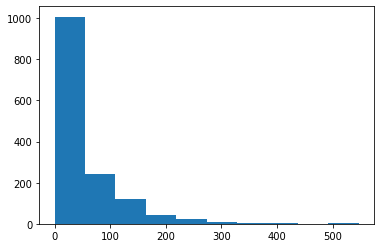

In [287]:
plt.hist(df_train['OpenPorchSF'])
plt.show()

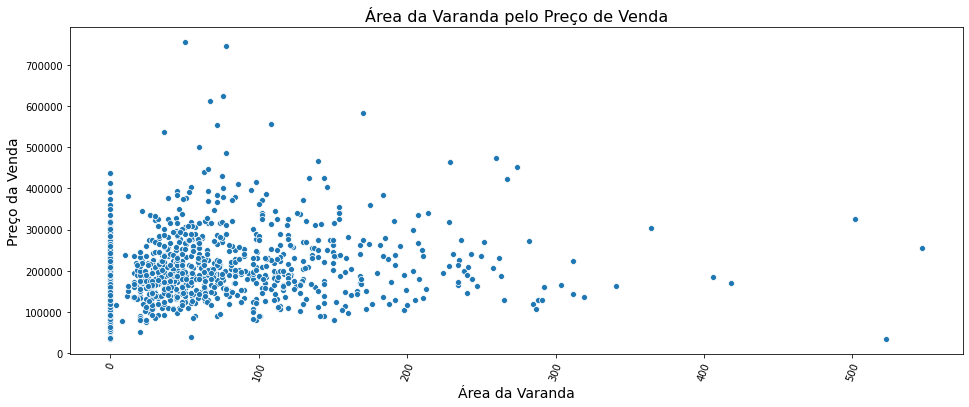

In [288]:
plt.figure(figsize=(16,6))
ax=sns.scatterplot(x=df_train.OpenPorchSF, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Área da Varanda", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Área da Varanda pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [289]:
df_train.loc[df_train['OpenPorchSF']==0, 'OpenPorchSF'].count()

656

In [290]:
df_train.loc[:, ['WoodDeckSF', 'SalePrice']].corr()

,WoodDeckSF,SalePrice
WoodDeckSF,1.000000,0.324413
SalePrice,0.324413,1.000000


<p><font size="3.5">Apesar da correlação positiva entre esses dados eu acredito que o alto número de área igual a 0 irá influenciar negativamente em meu algoritmo. Incialmente não irei utilizar esta variável</font><p>

## Área do alpendre fechado em pés quadrados

In [291]:
df_train['EnclosedPorch'].isnull().sum()

0

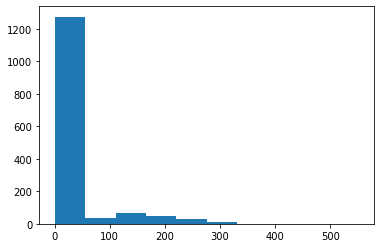

In [292]:
plt.hist(df_train['EnclosedPorch'])
plt.show()

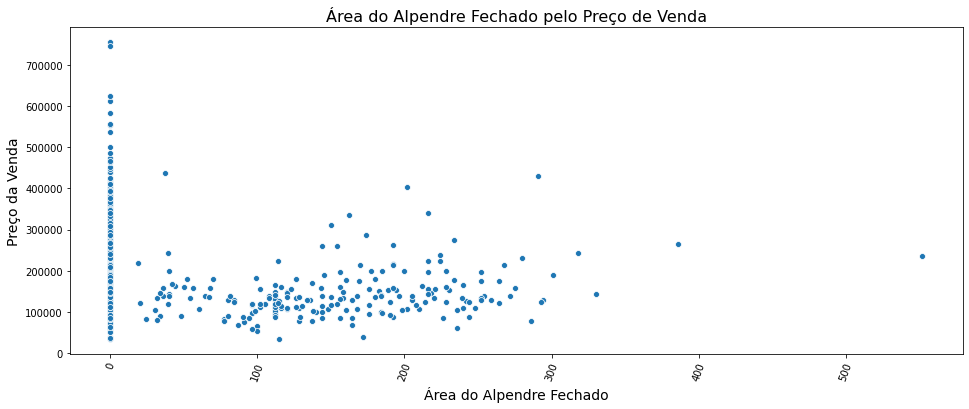

In [293]:
plt.figure(figsize=(16,6))
ax=sns.scatterplot(x=df_train.EnclosedPorch, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Área do Alpendre Fechado", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Área do Alpendre Fechado pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [294]:
df_train.loc[df_train['EnclosedPorch']==0, 'EnclosedPorch'].count()

1252

In [295]:
df_train.loc[:, ['EnclosedPorch', 'SalePrice']].corr()

,EnclosedPorch,SalePrice
EnclosedPorch,1.000000,-0.128578
SalePrice,-0.128578,1.000000


<p><font size="3.5">Também não utilizarei esses dados</font><p>

## Área da varanda de três estações em pés quadrados

In [296]:
df_train['3SsnPorch'].isnull().sum()

0

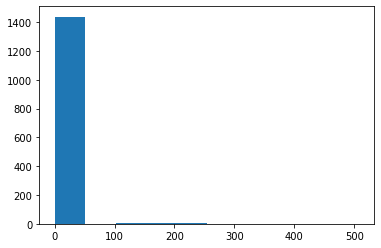

In [297]:
plt.hist(df_train['3SsnPorch'])
plt.show()

In [298]:
df_train.loc[df_train['3SsnPorch']==0, '3SsnPorch'].count()

1436

<p><font size="3.5">Também não utilizarei este dado pelo alto número de valores igual a 0.</font><p>

## Área da varanda de tela em pés quadrados

In [299]:
df_train['ScreenPorch'].isnull().sum()

0

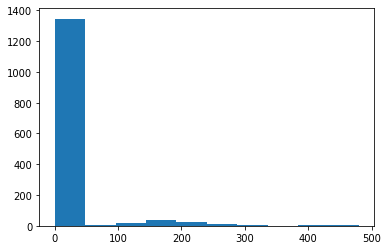

In [300]:
plt.hist(df_train['ScreenPorch'])
plt.show()

In [301]:
df_train.loc[df_train['ScreenPorch']==0, 'ScreenPorch'].count()

1344

<p><font size="3.5">Também não utilizarei este dado pelo alto número de valores igual a 0.</font><p>

## Área da piscina em pés quadrados

In [302]:
df_train['PoolArea'].isnull().sum()

0

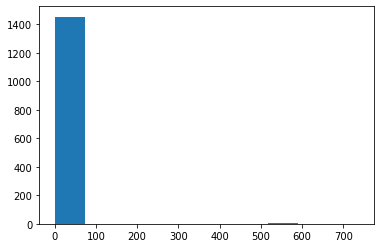

In [303]:
plt.hist(df_train['PoolArea'])
plt.show()

In [304]:
df_train.loc[df_train['PoolArea']==0, 'PoolArea'].count()

1453

<p><font size="3.5">Como pouquissimas casas possuem piscina não utilizarei esta variável.</font><p>

## Qualidade da piscina

In [305]:
df_train['PoolQC'].isnull().sum()

1453

In [306]:
df_train.loc[df_train['PoolQC'].isnull()==True, 'PoolQC'] = 'NA'

In [307]:
df_train.PoolQC.value_counts()

NA    1453
Gd       3
Fa       2
Ex       2
Name: PoolQC, dtype: int64

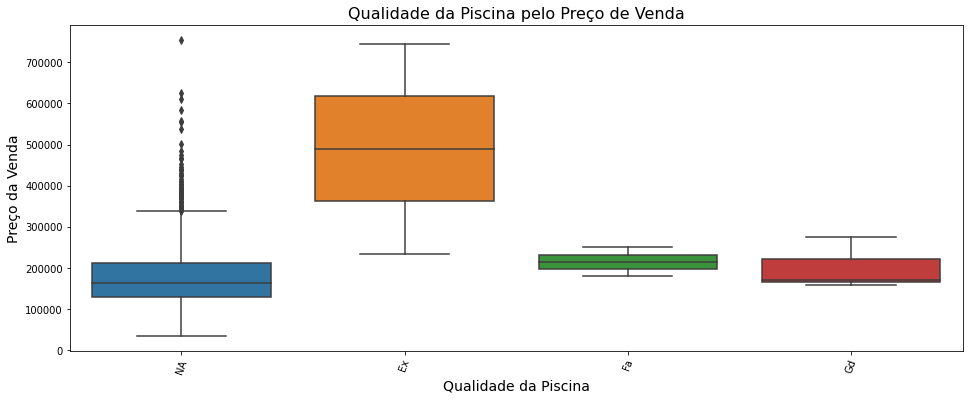

In [308]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.PoolQC, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Qualidade da Piscina", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Qualidade da Piscina pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Essa variável não será utilizada pela falta de dados de casas com piscinas</font><p>

## Qualidade da cerca

In [309]:
df_train['Fence'].isnull().sum()

1179

In [310]:
df_train.loc[df_train['Fence'].isnull()==True, 'Fence'] = 'NA'

In [311]:
df_train['Fence'].value_counts()

NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

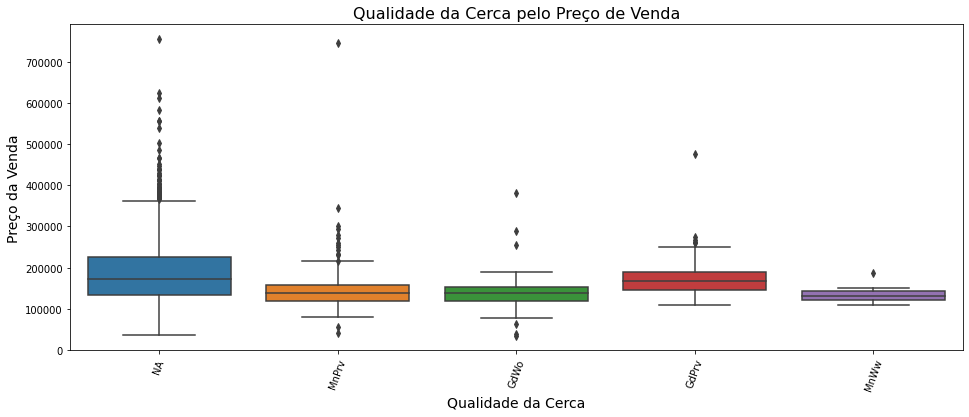

In [312]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.Fence, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Qualidade da Cerca", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Qualidade da Cerca pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Não usarei esta variável pelo fato de termos muitos outliers, ou seja, para cada tipo de característica existem sempre algum fora da curva e também não nos mostra muitas relações fortes.</font><p>

## Recurso variado não coberto em outras categorias

In [313]:
df_train['MiscFeature'].isnull().sum()

1406

In [314]:
df_train.loc[df_train['MiscFeature'].isnull()==True, 'MiscFeature'] = 'NA'

In [315]:
df_train['MiscFeature'].value_counts()

NA      1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

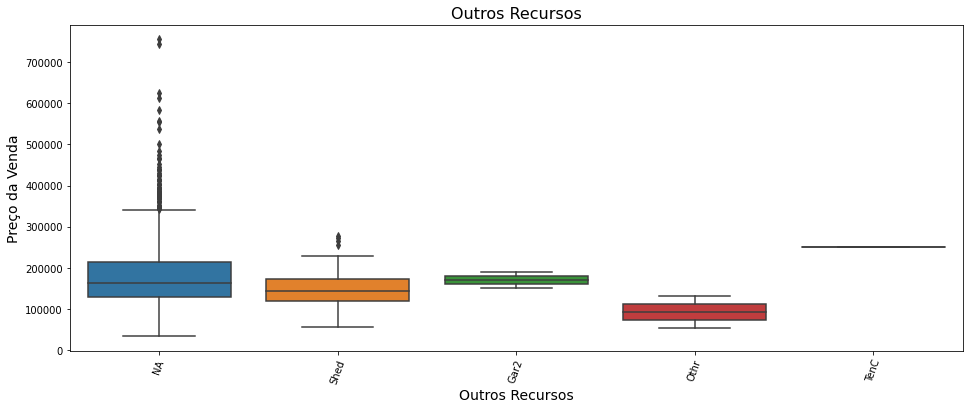

In [316]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.MiscFeature, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Outros Recursos", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Outros Recursos", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Este item também não vale a pena ser usado devido à grande variabilidade dos dados.</font><p>

## Valor do recurso diverso

In [317]:
df_train['MiscVal'].isnull().sum()

0

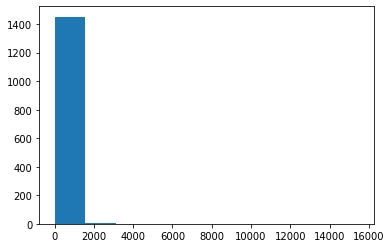

In [318]:
plt.hist(df_train['MiscVal'])
plt.show()

In [319]:
df_train.loc[df_train['MiscVal']==0, 'MiscVal'].count()

1408

<p><font size="3.5">Também não usarei este item pelo fato deles estarem bem desbalanceados.</font><p>

## Mês Vendido

In [320]:
df_train['MoSold'].isnull().sum()

0

In [321]:
df_train['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

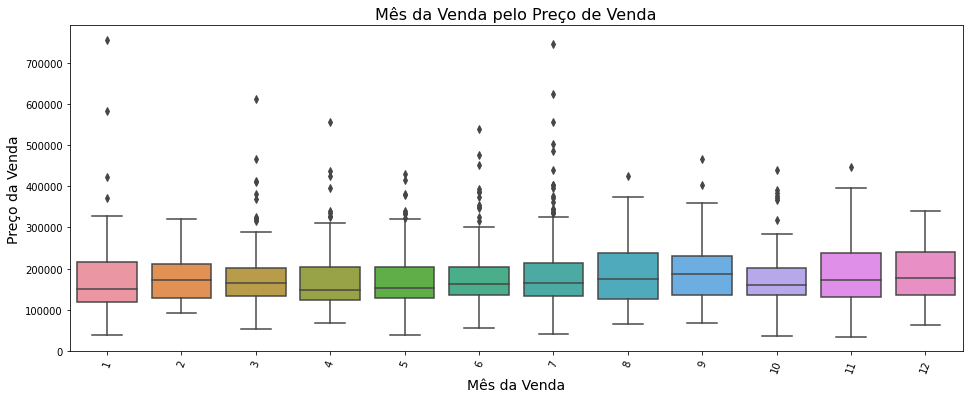

In [322]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.MoSold, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Mês da Venda", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Mês da Venda pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Esta caracteristica não influencia no modelo preditivo.</font><p>

## Tipo de venda

In [323]:
df_train['SaleType'].isnull().sum()

0

In [324]:
df_train['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

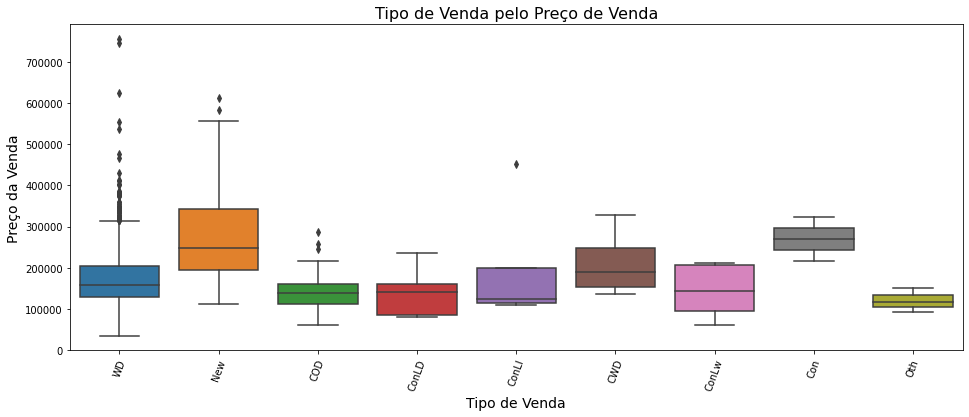

In [325]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.SaleType, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Tipo de Venda", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Tipo de Venda pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

<p><font size="3.5">Apesar do tipo de venda parecer influenciar em nosso modelo não utilirei pelo fato de as distribuições da variável estarem bem desbalanceadas</font><p>

## Condição de Venda

In [326]:
df_train['SaleCondition'].isnull().sum()

0

In [327]:
df_train['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

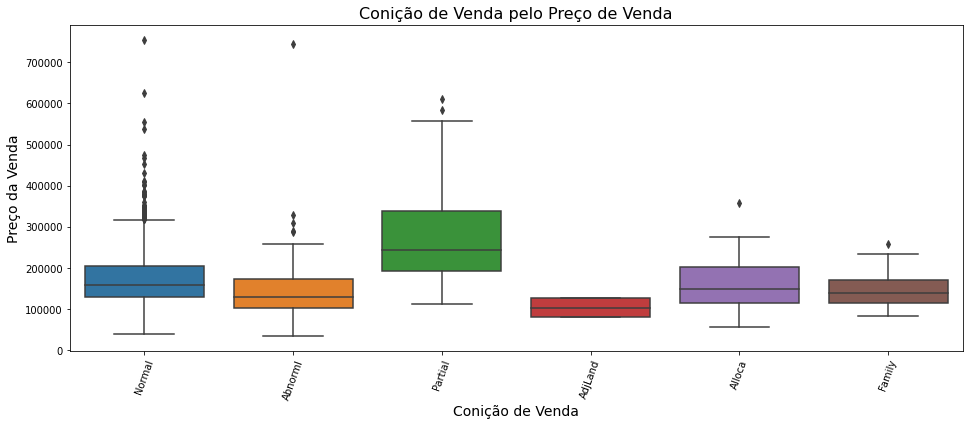

In [328]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x=df_train.SaleCondition, y=df_train.SalePrice, data=df_train)
ax.xaxis.set_label_text("Conição de Venda", fontsize=14)
ax.yaxis.set_label_text("Preço da Venda", fontsize=14)
ax.set_title("Conição de Venda pelo Preço de Venda", fontsize=16)
plt.xticks(rotation=70)
plt.show()

In [329]:
df_train.loc[df_train.SaleCondition == "AdjLand", "SaleCondition"] = "Abnorml"

<p><font size="3.5">Inicialmente irei utilizar essa variável.</font><p>

# Predição para o modelo 1

In [330]:
#Criação de X_treino e y_treino
columns = ["MSSubClass", "MSZoning", "LotFrontage", "LotArea", "LotShape", "LandContour", "Neighborhood", "Condition1", "BldgType", 
           "HouseStyle", "OverallQual", "YearRemodAdd", 'Exterior1st', "MasVnrType", "MasVnrArea", "ExterQual", "Foundation", "BsmtQual", 
           "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "HeatingQC", "CentralAir", "1stFlrSF", 
           "2ndFlrSF", "GrLivArea", "total_Bath", "total_HalfBath", "BedroomAbvGr", "KitchenQual", "TotRmsAbvGrd", "Fireplaces", 
           "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "PavedDrive", "SaleCondition"]
x1 = df_train[columns]
y1 = df_train["SalePrice"]

In [331]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

In [332]:
categorical_col = ["MSSubClass", "MSZoning", "LotShape", "LandContour", "Neighborhood", "Condition1", "BldgType", "HouseStyle","Exterior1st", 
                   "MasVnrType", "ExterQual", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "HeatingQC", "CentralAir",
                   "KitchenQual", "FireplaceQu", "GarageType", "GarageFinish", "PavedDrive", "SaleCondition"]

numerical_col = ["LotFrontage", "LotArea", "OverallQual", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", 
                 "1stFlrSF", "2ndFlrSF", "GrLivArea", "total_Bath", "total_HalfBath", "BedroomAbvGr", "TotRmsAbvGrd", "Fireplaces",
                 "GarageYrBlt", "GarageCars", "GarageArea"]

In [333]:
#Fazendo a transformação das colunas do dataframe
transCol = make_column_transformer((StandardScaler(), numerical_col), (OneHotEncoder(), categorical_col),
                                   remainder='passthrough')

In [334]:
#chamando a função LogisticRegression
logreg = LogisticRegression(solver='lbfgs')

pipe_v1 = make_pipeline(transCol, logreg)

pipe_v1.fit(x_train, y_train)

pipe_v1.score(x_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.0091324200913242

In [335]:
from sklearn.linear_model import LinearRegression

In [336]:
#chamando a função LogisticRegression
linreg = LinearRegression()

pipe_v2 = make_pipeline(transCol, linreg)

pipe_v2.fit(x_train, y_train)

pipe_v2.score(x_test, y_test)

0.7895240375987687

In [337]:
from sklearn import linear_model
olsr = linear_model.LinearRegression()

pipe_v3 = make_pipeline(transCol, olsr)

pipe_v3.fit(x_train, y_train)

pipe_v3.score(x_test, y_test)

0.7895240375987687

In [338]:
ridge = linear_model.Ridge(alpha=.5)

pipe_v4 = make_pipeline(transCol, ridge)

pipe_v4.fit(x_train, y_train)

pipe_v4.score(x_test, y_test)

0.7917286832994502

In [339]:
ridgeCV = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))

pipe_v5 = make_pipeline(transCol, ridgeCV)

pipe_v5.fit(x_train, y_train)

pipe_v5.score(x_test, y_test)

0.7924198506683284

In [340]:
lasso = linear_model.Lasso(alpha=0.1)

pipe_v6 = make_pipeline(transCol, lasso)

pipe_v6.fit(x_train, y_train)

pipe_v6.score(x_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225329570168.7964, tolerance: 623395084.5784422
  max_iter, tol, rng, random, positive)


0.7895877563773317

In [341]:
ransac = linear_model.RANSACRegressor()

pipe_v7 = make_pipeline(transCol, ransac)

pipe_v7.fit(x_train, y_train)

pipe_v7.score(x_test, y_test)

0.7512312265560684

In [342]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor(alpha=0.0, epsilon=1.3)

pipe_v8 = make_pipeline(transCol, huber)

pipe_v8.fit(x_train, y_train)

pipe_v8.score(x_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.779689749194382

In [343]:
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

pipe_v9 = make_pipeline(transCol, lasso)

pipe_v9.fit(x_train, y_train)

pipe_v9.score(x_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225329570168.7964, tolerance: 623395084.5784422
  max_iter, tol, rng, random, positive)


0.7895877563773317

In [344]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

pipe_v10 = make_pipeline(transCol, enet)

pipe_v10.fit(x_train, y_train)

pipe_v10.score(x_test, y_test)

0.7847202247855697

## Preparando o Dataset de Teste

In [345]:
#Lendo o arquivo 'test' de House Prices.
df_test = pd.read_csv('https://raw.githubusercontent.com/fthara/housesPrices/master/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [346]:
df_test.isnull().sum().head(40)

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
Alley           1352
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
dtype: int64

In [347]:
df_test.isnull().sum().tail(40)

HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond         78
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1456
Fence            1169
MiscFeature      1408
MiscVal             0
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
dtype: int64

<p><font size="3.5">Fazendo as mudanças necessárias para se adequar ao dataset de treino.</font><p>

In [348]:
#MSSubClass
df_test['MSSubClass'] = df_test['MSSubClass'].apply(str)
df_test.loc[df_test.MSSubClass == '150', 'MSSubClass'] = '160'
df_test.loc[df_test.MSSubClass == '40', 'MSSubClass'] = '70'

#MSZoning
df_test.loc[df_test.MSZoning.isnull() == True, ['MSZoning']] = "C (all)"

#LotFrontage
df_test.loc[df_test.LotFrontage.isnull() == True, ['LotFrontage']] = df_train.LotFrontage.median()

#Neighborhood
df_test.loc[df_test["Neighborhood"]=='Blueste', ["Neighborhood"]] = "SWISU"
df_test.loc[df_test["Neighborhood"]=='NPkVill', ["Neighborhood"]] = "SWISU"

#Condition1
df_test.loc[df_test["Condition1"] == "RRNe", "Condition1"] = "RRNn"
df_test.loc[df_test["Condition1"] == "PosA", "Condition1"] = "RRNn"

#Exterior1st
df_test.loc[df_test.Exterior1st.isnull() == True, ['Exterior1st']] = "CemntBd"
df_test.loc[df_test["Exterior1st"]=='AsphShn', 'Exterior1st'] = 'AsbShng'
df_test.loc[df_test["Exterior1st"]=='CBlock', 'Exterior1st'] = 'AsbShng'
df_test.loc[df_test["Exterior1st"]=='BrkComm', 'Exterior1st'] = 'AsbShng'
df_test.loc[df_test["Exterior1st"]=='ImStucc', 'Exterior1st'] = 'CemntBd'
df_test.loc[df_test["Exterior1st"]=='Stone', 'Exterior1st'] = 'CemntBd'

#MasVnrType
df_test.loc[df_test.MasVnrType.isnull() == True, "MasVnrType"] = "NA_MasVnrType"

#MasVnrArea
df_test.loc[df_test.MasVnrArea.isnull() == True, "MasVnrArea"] = df_train.MasVnrArea.mean()

#Foundation 
df_test.loc[df_test.Foundation == 'Stone', 'Foundation'] = 'Others'
df_test.loc[df_test.Foundation == 'Wood', 'Foundation'] = 'Others'

#BsmtQual
df_test.loc[df_test.BsmtQual.isnull() == True, "BsmtQual"] = "NA_BsmtQual"

#BsmtCond
df_test.loc[df_test.BsmtCond.isnull() == True, "BsmtCond"] = "NA_BsmtCond"
df_test.loc[df_test.BsmtCond == 'Po', 'BsmtCond'] = 'Fa'

#BsmtExposure
df_test.loc[df_test.BsmtExposure.isnull() == True, "BsmtExposure"] = "NA_BsmtExposure"

#BsmtFinType1
df_test.loc[df_test.BsmtFinType1.isnull() == True, "BsmtFinType1"] = "NA_BsmtFinType1"

#BsmtFinSF1
df_test.loc[df_test.BsmtFinSF1.isnull() == True, "BsmtFinSF1"] = 0

#BsmtUnfSF
df_test.loc[df_test.BsmtUnfSF.isnull() == True, "BsmtUnfSF"] = 0

#TotalBsmtSF
df_test.loc[df_test.TotalBsmtSF.isnull() == True, "TotalBsmtSF"] = 0

#HeatingQC
df_test.loc[df_test.HeatingQC == 'Po', 'HeatingQC'] = 'Fa'

#total_Bath
df_test["total_Bath"] = df_test.BsmtFullBath + df_test.FullBath
df_test.loc[df_test.total_Bath.isnull() == True, "total_Bath"] = round(df_train.total_Bath.median())

#total_HalfBath
df_test["total_HalfBath"] = df_test.BsmtHalfBath + df_test.HalfBath
df_test.loc[df_test.total_HalfBath.isnull() == True, "total_HalfBath"] = round(df_train.total_HalfBath.median())

#KitchenQual
df_test.loc[df_test.KitchenQual.isnull() == True, "KitchenQual"] = "TA"

#FireplaceQu
df_test.loc[df_test['FireplaceQu'].isnull()==True, 'FireplaceQu'] = 'NA_FireplaceQu'

#GarageType
df_test.loc[df_test['GarageType'].isnull()==True, 'GarageType'] = 'NA_GarageType'
df_test.loc[df_test.GarageType == '2Types', 'GarageType'] = 'Basment'
df_test.loc[df_test.GarageType == 'CarPort', 'GarageType'] = 'Detchd'

#GarageYrBlt
df_test.loc[df_test['GarageYrBlt'].isnull()==True, 'GarageYrBlt'] = round(df_train.GarageYrBlt.mean())

#GarageFinish
df_test.loc[df_test['GarageFinish'].isnull()==True, 'GarageFinish'] = 'NA_GarageFinish'

#GarageCars
df_test.loc[df_test['GarageCars'].isnull()==True, 'GarageCars'] = 0

#GarageArea
df_test.loc[df_test['GarageArea'].isnull()==True, 'GarageArea'] = 0

#SaleCondition
df_test.loc[df_test.SaleCondition == "AdjLand", "SaleCondition"] = "Abnorml"

In [349]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,total_Bath,total_HalfBath
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,1.0,0.0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,1.0,1.0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,2.0,1.0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,2.0,1.0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,2.0,0.0


## Predição do Primeiro Modelo

In [350]:
df_predict = df_test[columns]

In [351]:
df_train.BsmtFinType1.value_counts()

Unf                430
GLQ                418
ALQ                220
BLQ                148
Rec                133
LwQ                 74
NA_BsmtFinType1     37
Name: BsmtFinType1, dtype: int64

In [352]:
df_predict.BsmtFinType1.value_counts()

GLQ                431
Unf                421
ALQ                209
Rec                155
BLQ                121
LwQ                 80
NA_BsmtFinType1     42
Name: BsmtFinType1, dtype: int64

In [375]:
#Gerando a resposta

prediction_v1 = pipe_v5.predict(df_predict)
print(prediction_v1)

[102091.32413091 155253.92659032 171421.86393884 ... 159535.17601811
 118858.40739524 215312.4336816 ]


In [380]:
prediction_v1.rename("SalePrice")

Id
1461    102091.324131
1462    155253.926590
1463    171421.863939
1464    181911.702237
1465    202771.005428
            ...      
2915     66143.558740
2916     67232.115125
2917    159535.176018
2918    118858.407395
2919    215312.433682
Name: SalePrice, Length: 1459, dtype: float64

In [381]:
#Criando a série com a resposta.

prediction_v1 = pd.Series(prediction_v1, index=df_test["Id"])
prediction_v1.to_csv(r'predict_v1.csv', header=True)

In [382]:
!head -n5 predict_v1.csv

Id,0
1461,102091.32413090604
1462,155253.92659031707
1463,171421.8639388357
1464,181911.7022365534
